In [4]:
import dynamiqs
print(dir(dynamiqs))

['DenseQArray', 'FloquetResult', 'MEPropagatorResult', 'MESolveResult', 'Options', 'QArray', 'QArrayLike', 'SEPropagatorResult', 'SESolveResult', 'SparseDIAQArray', 'TimeQArray', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_checks', '_utils', 'asqarray', 'basis', 'basis_dm', 'bloch_coordinates', 'braket', 'cd_gate', 'cnot', 'coherent', 'coherent_dm', 'constant', 'cosm', 'create', 'dag', 'dark', 'dense', 'dense_qarray', 'destroy', 'dia', 'displace', 'dissipator', 'entropy_vn', 'excited', 'expect', 'expm', 'eye', 'eye_like', 'fidelity', 'floquet', 'fock', 'fock_dm', 'general', 'global_settings', 'gradient', 'ground', 'hadamard', 'hc', 'hermitian_conjugate', 'integrators', 'isbra', 'isdm', 'isherm', 'isket', 'isop', 'isqarraylike', 'layout', 'lindbladian', 'mepropagator', 'mesolve', 'modulated', 'momentum', 'norm', 'number', 'operator_to_vector', 'operators', 'optimal_control', 'options', 'overlap', 

|██████████| 100.0% ◆ elapsed 47.08ms ◆ remaining 0.00ms
100%|██████████| 50/50 [00:04<00:00, 12.27it/s]


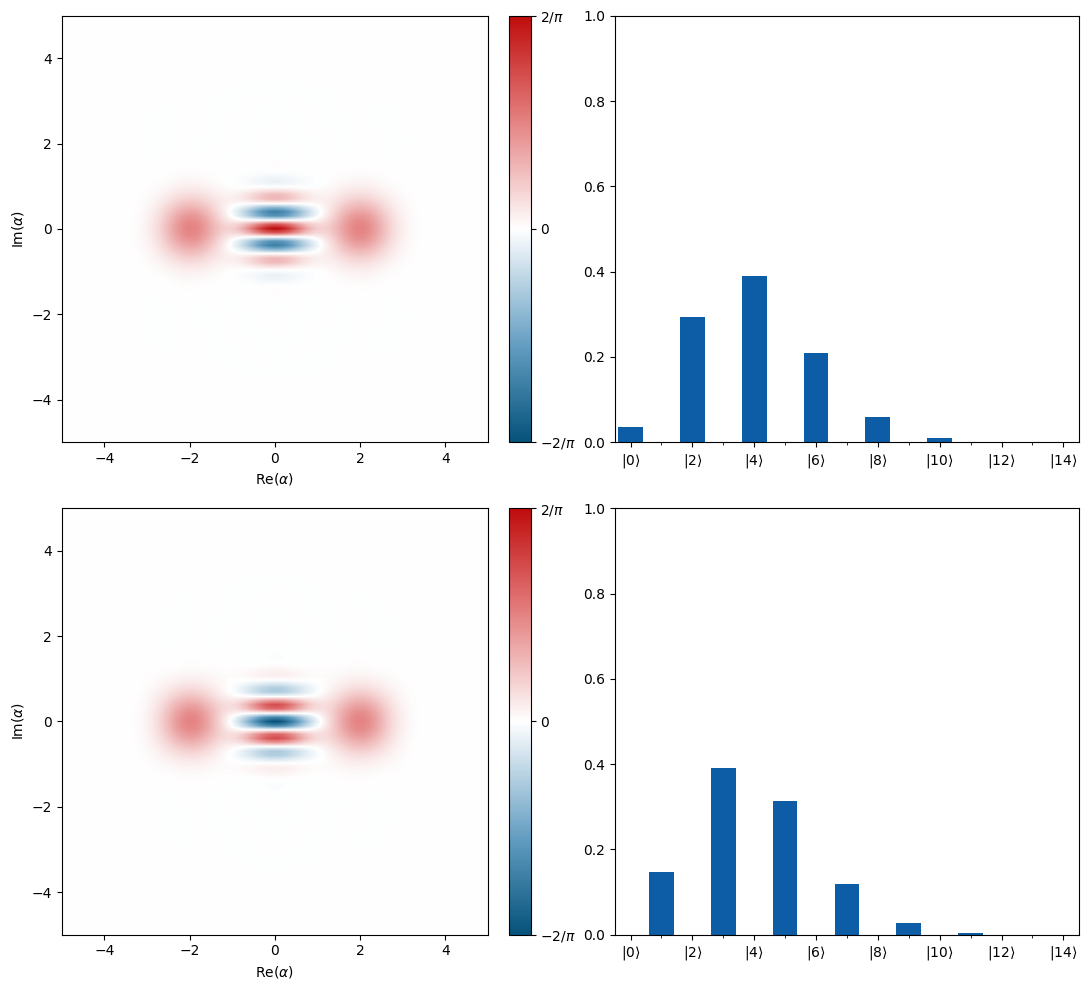

In [1]:
import dynamiqs as dq
import jax as jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
import dynamiqs as dq  # assuming dynamiqs is imported as dq

# --- Parameters and initial setup ---
alpha = 2.0             # Cat size
na = 15                 # Hilbert space dimension
a = dq.destroy(na)      # Annihilation operator
psi0 = dq.fock(na, 0)   # Initial state (vacuum)
H = dq.zeros(na)        # Zero Hamiltonian (no unitary evolution)
kappa_2 = 1             # 2 photon loss rate

# Create even and odd cat states (for later mosaic plots)
cat_even = dq.unit(dq.coherent(na, alpha) + dq.coherent(na, -alpha))
cat_odd  = dq.unit(dq.coherent(na, alpha) - dq.coherent(na, -alpha))

# --- Time evolution setup ---
t_save = np.linspace(0, 3, 100)
# Define the two-photon loss operator (using matrix multiplication '@')
loss_op = np.sqrt(kappa_2) * (a @ a - alpha**2 * dq.eye(na))
res = dq.mesolve(H, [loss_op], psi0, t_save)

# --- Create and save the Wigner function animation as a GIF ---
# Generate the animation without xlim and ylim arguments.
wigner_anim = dq.plot.wigner_gif(res.states)
# Save the animation as a GIF file (using the pillow writer and desired fps)
# wigner_anim.save('wigner_animation.gif', writer='pillow', fps=10)

# --- Optional: Create the mosaic plots for the cat states ---
fig, ax = plt.subplots(2, 2, figsize=(11, 10))
dq.plot.wigner(cat_even, ax=ax[0, 0])  # Wigner of even cat state
dq.plot.fock(cat_even, ax=ax[0, 1])    # Fock representation of even cat state
dq.plot.wigner(cat_odd, ax=ax[1, 0])     # Wigner of odd cat state
dq.plot.fock(cat_odd, ax=ax[1, 1])       # Fock representation of odd cat state
plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import dynamiqs as dq  # Replace or adjust according to your quantum module (e.g., qutip)
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

# 1. Run the Simulation
alpha = 2.0             # Cat size
na = 15                 # Hilbert space dimension
a = dq.destroy(na)      # Annihilation operator
psi0 = dq.fock(na, 0)   # Initial state
H = dq.zeros(na)        # Zero Hamiltonian
kappa_2 = 1             # 2 photon loss rate

# Time array for simulation
t_save = np.linspace(0, 4, 100)

# Define the loss operator
loss_op = np.sqrt(kappa_2) * (a @ a - alpha**2 * dq.eye(na))

# Run the simulation
res = dq.mesolve(H, [loss_op], psi0, t_save)

# 2. Set Up the Figure
fig, ax = plt.subplots(2, 2, figsize=(11, 10))

# 3. Define the Update Function
def update(frame):
    # Clear all subplots
    for a_axis in ax.flatten():
        a_axis.cla()
    
    # Get the quantum state for the current frame
    current_state = res.states[frame]
    
    # Plot Wigner and Fock representations
    dq.plot.wigner(current_state, ax=ax[0, 0])
    dq.plot.fock(current_state, ax=ax[0, 1])
    
    # For demonstration, re-use the same state on the bottom row.
    dq.plot.wigner(current_state, ax=ax[1, 0])
    dq.plot.fock(current_state, ax=ax[1, 1])
    
    # Update the title with the current time
    fig.suptitle(f'Time = {t_save[frame]:.2f}', fontsize=16)

# 4. Create the Animation
ani = animation.FuncAnimation(fig, update, frames=len(t_save), repeat=False)

# 5. Save the Animation as a GIF
filename = 'quantum_animation.gif'
ani.save(filename, writer=PillowWriter(fps=20))

# 6. (Optional) Display the GIF in Jupyter Notebook
plt.close(fig)
HTML(f'<img src="{filename}">')


|██████████| 100.0% ◆ elapsed 56.00ms ◆ remaining 0.00ms


|██████████| 100.0% ◆ elapsed 515.67ms ◆ remaining 0.00ms  


/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


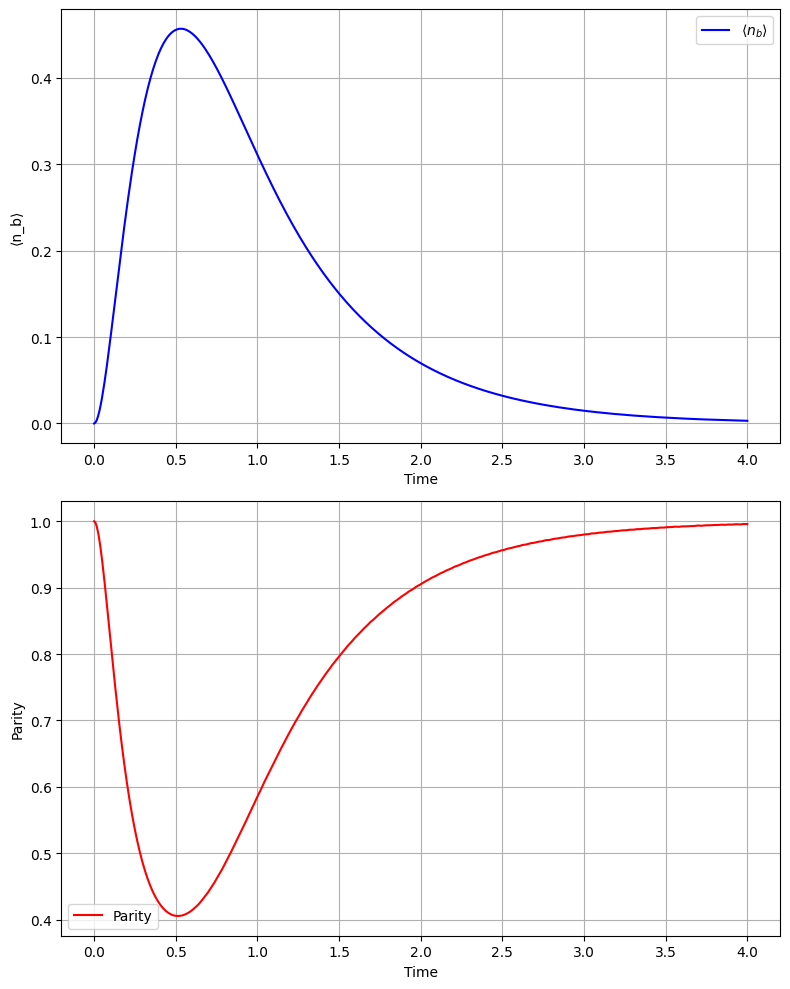

In [6]:
import dynamiqs as dq
import jax.numpy as jnp       
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML, display
from functools import reduce     # Import reduce to sum qarrays without starting with 0

# Hilbert-space truncations
na = 20   # Buffer mode a 
nb = 5    # Memory mode b

# Operators in the composite Hilbert space
a = dq.tensor(dq.destroy(na), dq.eye(nb))     # Mode a annihilation operator
adag = a.dag()                                # Mode a creation operator
b = dq.tensor(dq.eye(na), dq.destroy(nb))     # Mode b annihilation operator
bdag = b.dag()                                # Mode b creation operator

# Other parameters
g_2 = 1.0
eps_d = -4.0
kappa_b = 10

# Hamiltonian construction
H_2ph = g_2 * (adag @ adag @ b) + jnp.conjugate(g_2) * (a @ a @ bdag)
H_d = jnp.conjugate(eps_d) * b + eps_d * bdag
H = H_2ph + H_d

# Initalizes both modees in the vacuum state
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Creates time array
T = 4
t_save = jnp.linspace(0, T, 500) 

# Collapse operator on b
c_ops = [jnp.sqrt(kappa_b) * b]

# Solves the Linblad master equation
res = dq.mesolve(H, c_ops, psi0, t_save)

# Expectation value of n_b
n_b = bdag @ b

# Build the parity operator for mode b.
# Instead of using a diagonal function, sum over the Fock state projectors weighted by (-1)^n.
# It is assumed that dq.fock_dm(nb, n) creates the projector |n><n| for mode b.
terms = [ (-1)**n * dq.fock_dm(nb, n) for n in range(nb) ]
parity_b_local = reduce(lambda a, b: a + b, terms)
# Now, tensor with the identity for mode a.
parity_b = dq.tensor(dq.eye(na), parity_b_local)

# Compute expectation values for each time step.
n_b_expect = [dq.expect(n_b, state) for state in res.states]
parity_b_expect = [dq.expect(parity_b, state) for state in res.states]

# 6. Animate the Wigner function of mode a
fig_w, ax_w = plt.subplots(1, 1, figsize=(6, 6))

def update(frame):
    ax_w.cla()  # Clear the axis.
    # Obtain the reduced state of mode a by tracing out mode b.
    rho_a = dq.ptrace(res.states[frame], 0)
    dq.plot.wigner(rho_a, ax=ax_w)
    ax_w.set_title(f"Mode a Wigner Function\nTime = {t_save[frame]:.2f}")

ani = animation.FuncAnimation(fig_w, update, frames=len(t_save), repeat=False)
gif_filename = 'wigner_mode_a.gif'
ani.save(gif_filename, writer=PillowWriter(fps=25))
plt.close(fig_w)
display(HTML(f'<img src="{gif_filename}">'))

# 7. Plot the expectation value and parity for mode b
fig2, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Plot the expectation value of the photon number in mode b.
ax1.plot(t_save, n_b_expect, label=r'$\langle n_b \rangle$', color='blue')
ax1.set_xlabel('Time')
ax1.set_ylabel('⟨n_b⟩')
ax1.legend()
ax1.grid(True)

# Plot the photon number parity in mode b.
ax2.plot(t_save, parity_b_expect, label='Parity', color='red')
ax2.set_xlabel('Time')
ax2.set_ylabel('Parity')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

|██████████| 100.0% ◆ elapsed 86.63ms ◆ remaining 0.00ms


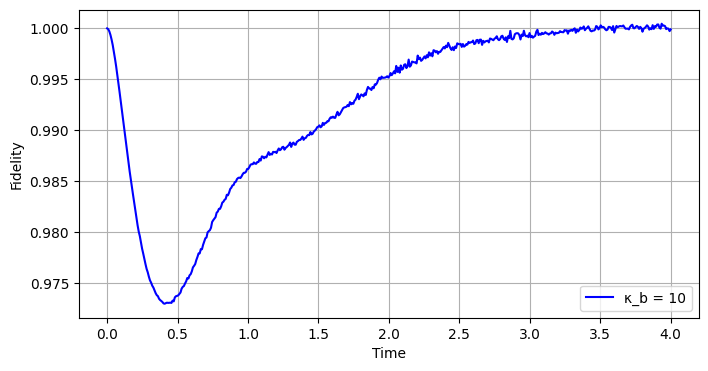

In [19]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Parameters from 1.1
g2 = 1.0
eps_d = -4.0
kappa_b = 10  # Original value (vary this later)
na = 20       # Truncation for mode a

# Compute effective parameters for adiabatic elimination
kappa_2 = 4 * abs(g2)**2 / kappa_b
alpha_sq = -eps_d / jnp.conj(g2)  # α² = 4 → α = 2
alpha = jnp.sqrt(alpha_sq)

# Single-mode collapse operator (effective model)
a = dq.destroy(na)
L_eff = jnp.sqrt(kappa_2) * (a @ a - alpha_sq * dq.eye(na))

# Initial state (vacuum for mode a)
psi0_eff = dq.fock(na, 0)

# Solve the effective single-mode master equation
res_eff = dq.mesolve(dq.zeros(na), [L_eff], psi0_eff, t_save)

# Extract states from both models
rho_a_list_task11 = [dq.ptrace(state, 0) for state in res.states]  
rho_a_list_eff = res_eff.states                                   

# Compute fidelity over time
fidelity = [dq.fidelity(rho_a, rho_eff) for rho_a, rho_eff in zip(rho_a_list_task11, rho_a_list_eff)]

# Plot fidelity
plt.figure(figsize=(8, 4))
plt.plot(t_save, fidelity, label=f'κ_b = {kappa_b}', color='blue')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.legend()
plt.grid(True)
plt.show()

|██████████| 100.0% ◆ elapsed 166.90ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 561.84ms ◆ remaining 0.00ms  


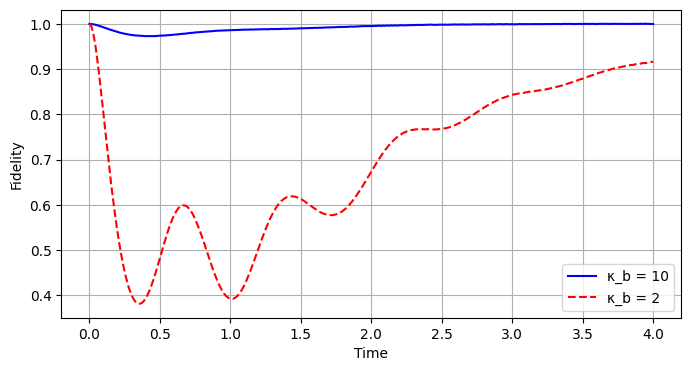

In [20]:
# New κ_b (weaker dissipation → adiabatic elimination less valid)
kappa_b_new = 2

# Recompute κ₂ for the new κ_b
kappa_2_new = 4 * abs(g2)**2 / kappa_b_new  # κ₂ = 2.0

# Simulate effective model with new κ₂
L_eff_new = jnp.sqrt(kappa_2_new) * (a @ a - alpha_sq * dq.eye(na))
res_eff_new = dq.mesolve(dq.zeros(na), [L_eff_new], psi0_eff, t_save)

# Re-run Task 1.1 with new κ_b (update collapse operator)
c_ops_new = [jnp.sqrt(kappa_b_new) * b]  # Update κ_b in original code
res_new = dq.mesolve(H, c_ops_new, psi0, t_save)

# Compute fidelity for new κ_b
rho_a_list_task11_new = [dq.ptrace(state, 0) for state in res_new.states]
fidelity_new = [dq.fidelity(rho_a, rho_eff_new) 
                for rho_a, rho_eff_new in zip(rho_a_list_task11_new, res_eff_new.states)]

# Plot both fidelities
plt.figure(figsize=(8, 4))
plt.plot(t_save, fidelity, label=f'κ_b = 10', color='blue')
plt.plot(t_save, fidelity_new, label=f'κ_b = 2', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.legend()
plt.grid(True)
plt.show()

|██████████| 100.0% ◆ elapsed 546.45ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 29.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 487.01ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 40.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 498.23ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 57.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 473.76ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 68.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 526.79ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 87.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 541.62ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 132.25ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 529.73ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 265.01ms ◆ remaining 0.00ms  


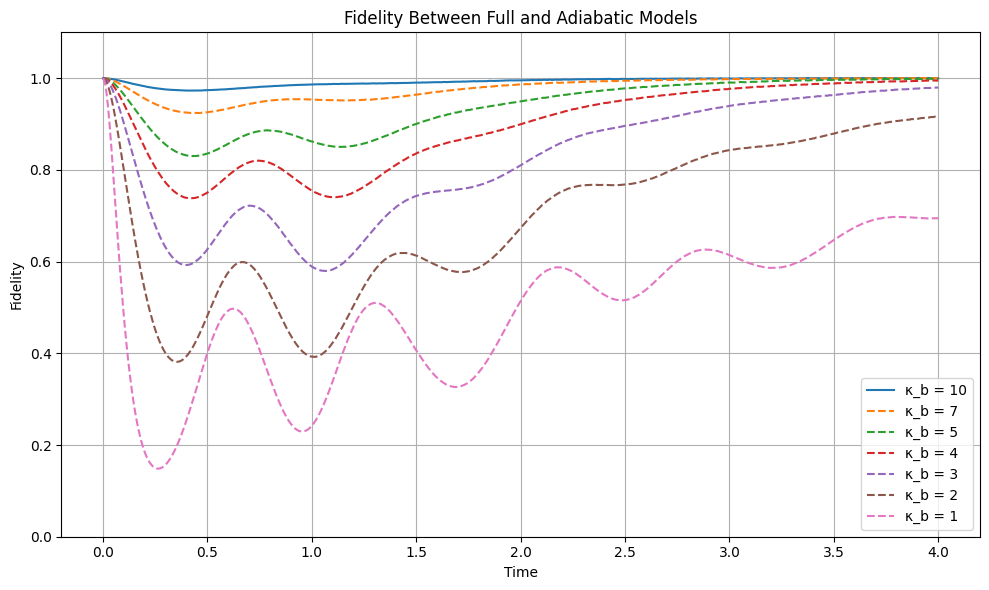

In [25]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Parameters
na = 20
nb = 5
g2 = 1.0
eps_d = -4.0
T = 4
t_save = jnp.linspace(0, T, 500)

# Lower κ_b values to test (including original 10 for comparison)
kappa_b_values = jnp.array([10, 7, 5, 4, 3, 2, 1])  

plt.figure(figsize=(10, 6))

for kappa_b in kappa_b_values:
    # 1. Two-Mode System (Original Task 1.1)
    # Composite operators
    a = dq.tensor(dq.destroy(na), dq.eye(nb))
    adag = a.dag()
    b = dq.tensor(dq.eye(na), dq.destroy(nb))
    
    # Hamiltonian
    H_2ph = g2 * (adag @ adag @ b) + jnp.conj(g2) * (a @ a @ b.dag())
    H_d = eps_d * (b + b.dag())
    H = H_2ph + H_d
    
    # Collapse operator
    c_ops = [jnp.sqrt(kappa_b) * b]
    
    # Initial state
    psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))
    
    # Solve master equation
    res = dq.mesolve(H, c_ops, psi0, t_save)
    
    # Get reduced states of mode a
    rho_a_list = [dq.ptrace(state, 0) for state in res.states]

    # 2. Adiabatically Eliminated System
    # Effective parameters
    kappa_2 = 4 * abs(g2)**2 / kappa_b
    alpha_sq = -eps_d / jnp.conj(g2)
    alpha = jnp.sqrt(alpha_sq)
    
    # Effective collapse operator
    a_eff = dq.destroy(na)
    L_eff = jnp.sqrt(kappa_2) * (a_eff @ a_eff - alpha_sq * dq.eye(na))
    
    # Solve effective system
    res_eff = dq.mesolve(dq.zeros(na), [L_eff], dq.fock(na, 0), t_save)
    
    # 3. Compute Fidelity
    fidelity = [dq.fidelity(rho_a, rho_eff) 
                for rho_a, rho_eff in zip(rho_a_list, res_eff.states)]
    
    # Plot results
    plt.plot(t_save, fidelity, label=f'κ_b = {kappa_b}', 
             linestyle='--' if kappa_b < 10 else '-')

# Plot Formatting
plt.xlabel('Time')
plt.ylabel('Fidelity')
plt.title('Fidelity Between Full and Adiabatic Models')
plt.legend()
plt.grid(True)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 201.05ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.12ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 429.90ms ◆ remaining 12.47s
|██████████| 100.0% ◆ elapsed 462.00ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 465.00ms ◆ remaining 13.49s

|██████████| 100.0% ◆ elapsed 516.75ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 519.25ms ◆ remaining 15.06s


|██████████| 100.0% ◆ elapsed 550.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.50ms ◆ remaining 0.00ms


Iter   0 | Loss: 0.0197


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 155.48ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.87ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 400.74ms ◆ remaining 11.62s
|██████████| 100.0% ◆ elapsed 456.23ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 458.32ms ◆ remaining 13.29s

|██████████| 100.0% ◆ elapsed 489.46ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 491.66ms ◆ remaining 14.26s


|██████████| 100.0% ◆ elapsed 538.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.91ms ◆ remaining 0.00ms


Iter   1 | Loss: 0.0185


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 212.28ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 112.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.06ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 429.96ms ◆ remaining 12.47s
|██████████| 100.0% ◆ elapsed 459.70ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 461.74ms ◆ remaining 13.39s

|██████████| 100.0% ◆ elapsed 507.76ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 510.69ms ◆ remaining 14.81s


|██████████| 100.0% ◆ elapsed 546.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.18ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.27ms ◆ remaining 0.00ms


Iter   2 | Loss: 0.0165


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 214.46ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 26.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.38ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 412.75ms ◆ remaining 11.97s
|██████████| 100.0% ◆ elapsed 447.32ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 447.45ms ◆ remaining 12.97s

|██████████| 100.0% ◆ elapsed 483.20ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 498.90ms ◆ remaining 14.11s


|██████████| 100.0% ◆ elapsed 536.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.41ms ◆ remaining 0.00ms


Iter   3 | Loss: 0.0150


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 142.91ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 115.18ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 106.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.42ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 437.92ms ◆ remaining 12.70s
|██████████| 100.0% ◆ elapsed 472.24ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 475.05ms ◆ remaining 13.77s

|██████████| 100.0% ◆ elapsed 511.56ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 514.71ms ◆ remaining 14.93s


|██████████| 100.0% ◆ elapsed 562.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.99ms ◆ remaining 0.00ms


Iter   4 | Loss: 0.0136


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 253.80ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 101.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.72ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 484.17ms ◆ remaining 14.04s
|██████████| 100.0% ◆ elapsed 542.09ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 545.77ms ◆ remaining 15.82s

|██████████| 100.0% ◆ elapsed 579.46ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 581.92ms ◆ remaining 16.87s


|██████████| 100.0% ◆ elapsed 636.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.05ms ◆ remaining 0.00ms


Iter   5 | Loss: 0.0123


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 218.23ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 117.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.43ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 444.00ms ◆ remaining 12.87s
|██████████| 100.0% ◆ elapsed 480.50ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 509.10ms ◆ remaining 14.76s

|██████████| 100.0% ◆ elapsed 544.48ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 543.51ms ◆ remaining 15.76s


|██████████| 100.0% ◆ elapsed 580.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.80ms ◆ remaining 0.00ms


Iter   6 | Loss: 0.0114


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 223.50ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 99.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.34ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 440.86ms ◆ remaining 12.78s
|██████████| 100.0% ◆ elapsed 473.67ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 475.63ms ◆ remaining 13.79s

|██████████| 100.0% ◆ elapsed 518.80ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 510.21ms ◆ remaining 14.79s


|██████████| 100.0% ◆ elapsed 544.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 53.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.52ms ◆ remaining 0.00ms


Iter   7 | Loss: 0.0106


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 190.10ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 130.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 82.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.57ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 451.68ms ◆ remaining 13.10s
|██████████| 100.0% ◆ elapsed 509.95ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 512.46ms ◆ remaining 14.86s

|██████████| 100.0% ◆ elapsed 546.57ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 549.97ms ◆ remaining 15.95s


|██████████| 100.0% ◆ elapsed 599.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.95ms ◆ remaining 0.00ms


Iter   8 | Loss: 0.0097


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 194.29ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 119.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.68ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 423.44ms ◆ remaining 12.28s
|██████████| 100.0% ◆ elapsed 454.61ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 457.21ms ◆ remaining 13.26s

|██████████| 100.0% ◆ elapsed 513.82ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 515.52ms ◆ remaining 14.95s


|██████████| 100.0% ◆ elapsed 547.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.10ms ◆ remaining 0.00ms


Iter   9 | Loss: 0.0091


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 263.94ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 30.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.34ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 472.58ms ◆ remaining 13.70s
|██████████| 100.0% ◆ elapsed 515.27ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 554.20ms ◆ remaining 15.05s

|██████████| 100.0% ◆ elapsed 592.88ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 596.30ms ◆ remaining 17.30s


|██████████| 100.0% ◆ elapsed 653.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.85ms ◆ remaining 0.00ms


Iter  10 | Loss: 0.0086


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 294.00ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 29.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.59ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 486.63ms ◆ remaining 14.11s
|██████████| 100.0% ◆ elapsed 519.14ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 521.87ms ◆ remaining 15.13s

|██████████| 100.0% ◆ elapsed 570.58ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 573.39ms ◆ remaining 16.63s


|██████████| 100.0% ◆ elapsed 605.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.75ms ◆ remaining 0.00ms


Iter  11 | Loss: 0.0081


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 250.23ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 115.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 69.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.95ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 483.33ms ◆ remaining 14.01s
|██████████| 100.0% ◆ elapsed 545.49ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 549.21ms ◆ remaining 15.93s

|██████████| 100.0% ◆ elapsed 584.05ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 587.49ms ◆ remaining 17.04s


|██████████| 100.0% ◆ elapsed 647.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.04ms ◆ remaining 0.00ms


Iter  12 | Loss: 0.0078


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 330.80ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 34.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.70ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 488.78ms ◆ remaining 14.17s
|██████████| 100.0% ◆ elapsed 554.68ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 557.05ms ◆ remaining 16.15s

|██████████| 100.0% ◆ elapsed 591.93ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 595.17ms ◆ remaining 17.26s


|██████████| 100.0% ◆ elapsed 640.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.42ms ◆ remaining 0.00ms


Iter  13 | Loss: 0.0076


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 327.18ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 70.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.30ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 521.78ms ◆ remaining 15.13s
|██████████| 100.0% ◆ elapsed 564.09ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 567.09ms ◆ remaining 16.44s

|██████████| 100.0% ◆ elapsed 614.40ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 617.97ms ◆ remaining 17.92s


|██████████| 100.0% ◆ elapsed 656.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.45ms ◆ remaining 0.00ms


Iter  14 | Loss: 0.0074


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 299.38ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 103.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.28ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 527.78ms ◆ remaining 15.30s
|██████████| 100.0% ◆ elapsed 564.28ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 566.14ms ◆ remaining 16.42s

|██████████| 100.0% ◆ elapsed 610.61ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 612.15ms ◆ remaining 17.75s


|██████████| 100.0% ◆ elapsed 649.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.81ms ◆ remaining 0.00ms


Iter  15 | Loss: 0.0072


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 243.34ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 126.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 69.77ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 552.79ms ◆ remaining 16.03s
|██████████| 100.0% ◆ elapsed 595.22ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 598.48ms ◆ remaining 17.36s

|██████████| 100.0% ◆ elapsed 654.67ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 658.51ms ◆ remaining 19.10s


|██████████| 100.0% ◆ elapsed 695.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 51.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.70ms ◆ remaining 0.00ms


Iter  16 | Loss: 0.0072


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 126.90ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 204.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.74ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 462.94ms ◆ remaining 13.42s
|██████████| 100.0% ◆ elapsed 516.60ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 520.80ms ◆ remaining 15.10s

|██████████| 100.0% ◆ elapsed 563.82ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 556.56ms ◆ remaining 16.14s


|██████████| 100.0% ◆ elapsed 599.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.74ms ◆ remaining 0.00ms


Iter  17 | Loss: 0.0071


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 276.57ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.05ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 518.02ms ◆ remaining 15.02s
|██████████| 100.0% ◆ elapsed 592.84ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 597.03ms ◆ remaining 17.31s

|██████████| 100.0% ◆ elapsed 665.94ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 669.07ms ◆ remaining 19.40s


|██████████| 100.0% ◆ elapsed 707.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.31ms ◆ remaining 0.00ms


Iter  18 | Loss: 0.0070


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 291.26ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 121.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.76ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 526.87ms ◆ remaining 15.28s
|██████████| 100.0% ◆ elapsed 591.86ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 594.26ms ◆ remaining 17.23s

|██████████| 100.0% ◆ elapsed 634.82ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 637.33ms ◆ remaining 18.48s


|██████████| 100.0% ◆ elapsed 680.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.43ms ◆ remaining 0.00ms


Iter  19 | Loss: 0.0069


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 390.92ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 39.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.29ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 558.79ms ◆ remaining 16.20s
|██████████| 100.0% ◆ elapsed 623.60ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 625.89ms ◆ remaining 18.15s

|██████████| 100.0% ◆ elapsed 685.27ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 509.02ms ◆ remaining 14.76s


|██████████| 100.0% ◆ elapsed 549.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.70ms ◆ remaining 0.00ms


Iter  20 | Loss: 0.0069


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 291.56ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 92.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.40ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 510.96ms ◆ remaining 14.81s
|██████████| 100.0% ◆ elapsed 577.61ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 580.83ms ◆ remaining 16.84s

|██████████| 100.0% ◆ elapsed 620.58ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 624.04ms ◆ remaining 18.10s


|██████████| 100.0% ◆ elapsed 673.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.39ms ◆ remaining 0.00ms


Iter  21 | Loss: 0.0068


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 314.19ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 108.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.95ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 549.16ms ◆ remaining 15.92s
|██████████| 100.0% ◆ elapsed 608.91ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 609.49ms ◆ remaining 17.67s

|██████████| 100.0% ◆ elapsed 644.99ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 646.94ms ◆ remaining 18.76s


|██████████| 100.0% ◆ elapsed 687.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.40ms ◆ remaining 0.00ms


Iter  22 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 273.59ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 100.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.19ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 497.19ms ◆ remaining 14.41s
|██████████| 100.0% ◆ elapsed 542.97ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 545.57ms ◆ remaining 15.82s

|██████████| 100.0% ◆ elapsed 605.67ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 609.42ms ◆ remaining 17.67s


|██████████| 100.0% ◆ elapsed 672.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.43ms ◆ remaining 0.00ms


Iter  23 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 260.59ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 107.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 50.38ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 503.00ms ◆ remaining 14.58s
|██████████| 100.0% ◆ elapsed 557.97ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 561.11ms ◆ remaining 16.27s

|██████████| 100.0% ◆ elapsed 601.64ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 605.44ms ◆ remaining 17.55s


|██████████| 100.0% ◆ elapsed 662.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.10ms ◆ remaining 0.00ms


Iter  24 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 311.78ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 31.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.31ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 470.89ms ◆ remaining 13.65s
|██████████| 100.0% ◆ elapsed 536.77ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 540.08ms ◆ remaining 15.66s

|██████████| 100.0% ◆ elapsed 574.30ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 577.30ms ◆ remaining 16.74s


|██████████| 100.0% ◆ elapsed 624.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.86ms ◆ remaining 0.00ms


Iter  25 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 305.66ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 33.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.29ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 512.33ms ◆ remaining 14.86s
|██████████| 100.0% ◆ elapsed 551.92ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 555.42ms ◆ remaining 16.11s

|██████████| 100.0% ◆ elapsed 606.90ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 609.47ms ◆ remaining 17.68s


|██████████| 100.0% ◆ elapsed 643.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.26ms ◆ remaining 0.00ms


Iter  26 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 221.43ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 118.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.18ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 453.85ms ◆ remaining 13.16s
|██████████| 100.0% ◆ elapsed 509.08ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 511.21ms ◆ remaining 14.83s

|██████████| 100.0% ◆ elapsed 544.80ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 543.50ms ◆ remaining 15.76s


|██████████| 100.0% ◆ elapsed 598.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.43ms ◆ remaining 0.00ms


Iter  27 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 247.82ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 94.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 69.71ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 460.22ms ◆ remaining 13.35s
|██████████| 100.0% ◆ elapsed 494.57ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 497.62ms ◆ remaining 14.43s

|██████████| 100.0% ◆ elapsed 547.43ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 550.21ms ◆ remaining 15.96s


|██████████| 100.0% ◆ elapsed 586.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.17ms ◆ remaining 0.00ms


Iter  28 | Loss: 0.0067


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 252.46ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 94.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.48ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 479.58ms ◆ remaining 13.90s
|██████████| 100.0% ◆ elapsed 519.07ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 537.85ms ◆ remaining 15.60s

|██████████| 100.0% ◆ elapsed 573.91ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 576.94ms ◆ remaining 16.74s


|██████████| 100.0% ◆ elapsed 612.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.60ms ◆ remaining 0.00ms


Iter  29 | Loss: 0.0066


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 285.78ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 37.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.07ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 452.38ms ◆ remaining 13.12s
|██████████| 100.0% ◆ elapsed 512.55ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 514.09ms ◆ remaining 14.91s

|██████████| 100.0% ◆ elapsed 549.47ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 553.31ms ◆ remaining 16.05s


|██████████| 100.0% ◆ elapsed 599.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 28.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.18ms ◆ remaining 0.00ms


Iter  30 | Loss: 0.0066


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 211.93ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 113.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.83ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 441.65ms ◆ remaining 12.81s
|██████████| 100.0% ◆ elapsed 497.68ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 500.82ms ◆ remaining 14.53s

|██████████| 100.0% ◆ elapsed 532.26ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 535.06ms ◆ remaining 15.52s


|██████████| 100.0% ◆ elapsed 564.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.49ms ◆ remaining 0.00ms


Iter  31 | Loss: 0.0066


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 305.24ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 38.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.93ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 469.22ms ◆ remaining 13.61s
|██████████| 100.0% ◆ elapsed 518.83ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 520.54ms ◆ remaining 15.09s

|██████████| 100.0% ◆ elapsed 556.30ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 558.02ms ◆ remaining 16.18s


|██████████| 100.0% ◆ elapsed 612.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.96ms ◆ remaining 0.00ms


Iter  32 | Loss: 0.0066


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 215.78ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.72ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 455.75ms ◆ remaining 13.21s
|██████████| 100.0% ◆ elapsed 517.35ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 520.94ms ◆ remaining 15.10s

|██████████| 100.0% ◆ elapsed 557.69ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 561.94ms ◆ remaining 16.29s


|██████████| 100.0% ◆ elapsed 609.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 53.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.98ms ◆ remaining 0.00ms


Iter  33 | Loss: 0.0066


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 245.48ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 40.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.75ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 448.11ms ◆ remaining 12.99s
|██████████| 100.0% ◆ elapsed 481.30ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 483.33ms ◆ remaining 14.02s

|██████████| 100.0% ◆ elapsed 515.19ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 517.34ms ◆ remaining 15.01s


|██████████| 100.0% ◆ elapsed 560.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 55.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.82ms ◆ remaining 0.00ms


Iter  34 | Loss: 0.0065


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 232.18ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 38.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.00ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 452.89ms ◆ remaining 13.13s
|██████████| 100.0% ◆ elapsed 494.94ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 497.97ms ◆ remaining 14.44s

|██████████| 100.0% ◆ elapsed 544.86ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 548.03ms ◆ remaining 15.89s


|██████████| 100.0% ◆ elapsed 580.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.34ms ◆ remaining 0.00ms


Iter  35 | Loss: 0.0065


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 218.76ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 107.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.31ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 442.11ms ◆ remaining 12.82s
|██████████| 100.0% ◆ elapsed 477.55ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 479.54ms ◆ remaining 13.91s

|██████████| 100.0% ◆ elapsed 528.40ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 530.69ms ◆ remaining 15.39s


|██████████| 100.0% ◆ elapsed 563.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.60ms ◆ remaining 0.00ms


Iter  36 | Loss: 0.0065


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 238.74ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.40ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 471.24ms ◆ remaining 13.66s
|██████████| 100.0% ◆ elapsed 538.78ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 541.68ms ◆ remaining 15.71s

|██████████| 100.0% ◆ elapsed 576.67ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 573.80ms ◆ remaining 16.64s


|██████████| 100.0% ◆ elapsed 627.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 56.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.35ms ◆ remaining 0.00ms


Iter  37 | Loss: 0.0065


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 197.19ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 122.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.88ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 445.45ms ◆ remaining 12.92s
|██████████| 100.0% ◆ elapsed 510.34ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 513.34ms ◆ remaining 14.88s

|██████████| 100.0% ◆ elapsed 548.32ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 550.80ms ◆ remaining 15.98s


|██████████| 100.0% ◆ elapsed 603.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.84ms ◆ remaining 0.00ms


Iter  38 | Loss: 0.0065


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 267.73ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 84.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.86ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 468.18ms ◆ remaining 13.58s
|██████████| 100.0% ◆ elapsed 504.46ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 506.32ms ◆ remaining 14.68s

|██████████| 100.0% ◆ elapsed 550.28ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 514.01ms ◆ remaining 14.90s


|██████████| 100.0% ◆ elapsed 547.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 50.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.33ms ◆ remaining 0.00ms


Iter  39 | Loss: 0.0064


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 289.83ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 36.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.79ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 500.02ms ◆ remaining 14.50s
|██████████| 100.0% ◆ elapsed 538.14ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 541.30ms ◆ remaining 15.70s

|██████████| 100.0% ◆ elapsed 593.43ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 597.46ms ◆ remaining 17.33s


|██████████| 100.0% ◆ elapsed 629.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.89ms ◆ remaining 0.00ms


Iter  40 | Loss: 0.0064


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 305.43ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 39.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 82.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.82ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 499.85ms ◆ remaining 13.82s
|██████████| 100.0% ◆ elapsed 535.99ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 537.86ms ◆ remaining 15.60s

|██████████| 100.0% ◆ elapsed 573.13ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 594.13ms ◆ remaining 16.67s


|██████████| 100.0% ◆ elapsed 627.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.94ms ◆ remaining 0.00ms


Iter  41 | Loss: 0.0064


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 290.31ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.13ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 589.84ms ◆ remaining 17.10s
|██████████| 100.0% ◆ elapsed 630.49ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 675.53ms ◆ remaining 19.59s

|██████████| 100.0% ◆ elapsed 709.94ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 713.10ms ◆ remaining 20.69s


|██████████| 100.0% ◆ elapsed 781.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.42ms ◆ remaining 0.00ms


Iter  42 | Loss: 0.0064


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 247.91ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 195.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.26ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 640.72ms ◆ remaining 17.28s
|██████████| 100.0% ◆ elapsed 685.70ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 688.66ms ◆ remaining 19.97s

|██████████| 100.0% ◆ elapsed 755.70ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 720.02ms ◆ remaining 20.88s


|██████████| 100.0% ◆ elapsed 755.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.32ms ◆ remaining 0.00ms


Iter  43 | Loss: 0.0064


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 383.05ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 110.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.83ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 679.95ms ◆ remaining 19.72s
|██████████| 100.0% ◆ elapsed 723.40ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 771.03ms ◆ remaining 22.36s

|██████████| 100.0% ◆ elapsed 810.90ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 744.88ms ◆ remaining 21.61s


|██████████| 100.0% ◆ elapsed 820.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.95ms ◆ remaining 0.00ms


Iter  44 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 377.00ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 112.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.33ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 681.21ms ◆ remaining 19.76s
|██████████| 100.0% ◆ elapsed 722.27ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 725.36ms ◆ remaining 21.04s

|██████████| 100.0% ◆ elapsed 792.06ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 793.73ms ◆ remaining 23.02s


|██████████| 100.0% ◆ elapsed 870.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.71ms ◆ remaining 0.00ms


Iter  45 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 471.88ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 92.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.75ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 760.49ms ◆ remaining 20.55s
|██████████| 100.0% ◆ elapsed 801.59ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 645.49ms ◆ remaining 18.72s

|██████████| 100.0% ◆ elapsed 719.99ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 719.92ms ◆ remaining 20.88s


|██████████| 100.0% ◆ elapsed 798.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.40ms ◆ remaining 0.00ms


Iter  46 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 460.54ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 38.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.04ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 700.42ms ◆ remaining 20.32s
|██████████| 100.0% ◆ elapsed 781.90ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 733.33ms ◆ remaining 21.27s

|██████████| 100.0% ◆ elapsed 808.07ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 615.40ms ◆ remaining 17.85s


|██████████| 100.0% ◆ elapsed 653.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.95ms ◆ remaining 0.00ms


Iter  47 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 294.27ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 39.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.07ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 628.49ms ◆ remaining 18.23s
|██████████| 100.0% ◆ elapsed 709.93ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 712.85ms ◆ remaining 20.67s

|██████████| 100.0% ◆ elapsed 793.56ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 797.28ms ◆ remaining 23.13s


|██████████| 100.0% ◆ elapsed 879.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.17ms ◆ remaining 0.00ms


Iter  48 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 416.15ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 86.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.92ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 696.55ms ◆ remaining 20.20s
|██████████| 100.0% ◆ elapsed 737.70ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 740.08ms ◆ remaining 21.47s

|██████████| 100.0% ◆ elapsed 815.92ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 818.38ms ◆ remaining 23.74s


|██████████| 100.0% ◆ elapsed 894.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.49ms ◆ remaining 0.00ms


Iter  49 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 319.76ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 93.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.48ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.47ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 608.89ms ◆ remaining 17.66s
|██████████| 100.0% ◆ elapsed 649.53ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 694.75ms ◆ remaining 20.15s

|██████████| 100.0% ◆ elapsed 728.23ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 730.41ms ◆ remaining 21.19s


|██████████| 100.0% ◆ elapsed 806.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.30ms ◆ remaining 0.00ms


Iter  50 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 374.46ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 33.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.90ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 617.43ms ◆ remaining 17.91s
|██████████| 100.0% ◆ elapsed 699.33ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 700.95ms ◆ remaining 20.33s

|██████████| 100.0% ◆ elapsed 786.60ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 726.70ms ◆ remaining 21.08s


|██████████| 100.0% ◆ elapsed 800.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.62ms ◆ remaining 0.00ms


Iter  51 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 249.22ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 101.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.21ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 583.66ms ◆ remaining 16.93s
|██████████| 100.0% ◆ elapsed 663.55ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 629.70ms ◆ remaining 18.27s

|██████████| 100.0% ◆ elapsed 707.71ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 709.67ms ◆ remaining 20.59s


|██████████| 100.0% ◆ elapsed 743.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.11ms ◆ remaining 0.00ms


Iter  52 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 291.95ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 117.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.72ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 614.09ms ◆ remaining 17.81s
|██████████| 100.0% ◆ elapsed 691.89ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 694.44ms ◆ remaining 20.14s

|██████████| 100.0% ◆ elapsed 777.64ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 781.17ms ◆ remaining 22.66s


|██████████| 100.0% ◆ elapsed 819.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.06ms ◆ remaining 0.00ms


Iter  53 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 343.81ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 33.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.91ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 541.80ms ◆ remaining 15.72s
|██████████| 100.0% ◆ elapsed 624.51ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 625.21ms ◆ remaining 18.14s

|██████████| 100.0% ◆ elapsed 706.67ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 709.28ms ◆ remaining 20.58s


|██████████| 100.0% ◆ elapsed 747.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.23ms ◆ remaining 0.00ms


Iter  54 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 290.93ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 126.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.30ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 608.10ms ◆ remaining 17.64s
|██████████| 100.0% ◆ elapsed 698.38ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 700.25ms ◆ remaining 20.32s

|██████████| 100.0% ◆ elapsed 733.23ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 778.05ms ◆ remaining 21.35s


|██████████| 100.0% ◆ elapsed 809.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.60ms ◆ remaining 0.00ms


Iter  55 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 277.80ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 116.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.39ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 582.76ms ◆ remaining 16.90s
|██████████| 100.0% ◆ elapsed 661.46ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 606.09ms ◆ remaining 17.58s

|██████████| 100.0% ◆ elapsed 638.98ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 640.44ms ◆ remaining 18.58s


|██████████| 100.0% ◆ elapsed 708.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.50ms ◆ remaining 0.00ms


Iter  56 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 344.52ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 40.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.69ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 587.02ms ◆ remaining 17.02s
|██████████| 100.0% ◆ elapsed 669.41ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 672.19ms ◆ remaining 19.50s

|██████████| 100.0% ◆ elapsed 750.59ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 753.32ms ◆ remaining 21.86s


|██████████| 100.0% ◆ elapsed 790.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 76.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.51ms ◆ remaining 0.00ms


Iter  57 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 271.82ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 112.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.38ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 563.99ms ◆ remaining 16.35s
|██████████| 100.0% ◆ elapsed 594.54ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 596.71ms ◆ remaining 17.31s

|██████████| 100.0% ◆ elapsed 670.42ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 673.09ms ◆ remaining 19.53s


|██████████| 100.0% ◆ elapsed 709.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.35ms ◆ remaining 0.00ms


Iter  58 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 297.10ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 110.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.73ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 592.81ms ◆ remaining 17.20s
|██████████| 100.0% ◆ elapsed 627.68ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 631.45ms ◆ remaining 18.32s

|██████████| 100.0% ◆ elapsed 710.99ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 715.30ms ◆ remaining 20.75s


|██████████| 100.0% ◆ elapsed 793.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.23ms ◆ remaining 0.00ms


Iter  59 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 353.49ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 35.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.13ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 576.13ms ◆ remaining 16.71s
|██████████| 100.0% ◆ elapsed 655.58ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 658.46ms ◆ remaining 19.10s

|██████████| 100.0% ◆ elapsed 692.83ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 696.14ms ◆ remaining 20.19s


|██████████| 100.0% ◆ elapsed 775.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.23ms ◆ remaining 0.00ms


Iter  60 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 284.63ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.79ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 593.16ms ◆ remaining 17.21s
|██████████| 100.0% ◆ elapsed 676.20ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 677.53ms ◆ remaining 19.66s

|██████████| 100.0% ◆ elapsed 713.10ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 650.68ms ◆ remaining 18.88s


|██████████| 100.0% ◆ elapsed 729.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.99ms ◆ remaining 0.00ms


Iter  61 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 261.24ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 36.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.51ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 430.40ms ◆ remaining 12.48s
|██████████| 100.0% ◆ elapsed 479.43ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 481.35ms ◆ remaining 13.96s

|██████████| 100.0% ◆ elapsed 514.01ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 516.29ms ◆ remaining 14.98s


|██████████| 100.0% ◆ elapsed 557.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.24ms ◆ remaining 0.00ms


Iter  62 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 275.13ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 38.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.98ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 479.49ms ◆ remaining 13.91s
|██████████| 100.0% ◆ elapsed 510.91ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 514.02ms ◆ remaining 14.91s

|██████████| 100.0% ◆ elapsed 548.83ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 551.79ms ◆ remaining 16.00s


|██████████| 100.0% ◆ elapsed 600.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.13ms ◆ remaining 0.00ms


Iter  63 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 236.06ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 95.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.86ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 448.58ms ◆ remaining 13.01s
|██████████| 100.0% ◆ elapsed 482.95ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 485.71ms ◆ remaining 14.08s

|██████████| 100.0% ◆ elapsed 531.05ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 533.86ms ◆ remaining 15.48s


|██████████| 100.0% ◆ elapsed 570.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 51.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.38ms ◆ remaining 0.00ms


Iter  64 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 278.86ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 32.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.93ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 434.42ms ◆ remaining 12.60s
|██████████| 100.0% ◆ elapsed 495.38ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 498.08ms ◆ remaining 14.44s

|██████████| 100.0% ◆ elapsed 534.91ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 537.44ms ◆ remaining 15.59s


|██████████| 100.0% ◆ elapsed 590.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.35ms ◆ remaining 0.00ms


Iter  65 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 288.80ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 40.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 82.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.91ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 495.99ms ◆ remaining 14.38s
|██████████| 100.0% ◆ elapsed 536.75ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 539.35ms ◆ remaining 15.64s

|██████████| 100.0% ◆ elapsed 593.15ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 596.09ms ◆ remaining 17.29s


|██████████| 100.0% ◆ elapsed 635.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.74ms ◆ remaining 0.00ms


Iter  66 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 226.43ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 117.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.37ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 456.66ms ◆ remaining 13.24s
|██████████| 100.0% ◆ elapsed 515.31ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 510.83ms ◆ remaining 14.81s

|██████████| 100.0% ◆ elapsed 548.39ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 550.35ms ◆ remaining 15.96s


|██████████| 100.0% ◆ elapsed 596.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.32ms ◆ remaining 0.00ms


Iter  67 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 266.82ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 97.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.99ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 483.22ms ◆ remaining 14.01s
|██████████| 100.0% ◆ elapsed 540.87ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 543.99ms ◆ remaining 15.78s

|██████████| 100.0% ◆ elapsed 581.71ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 584.89ms ◆ remaining 16.96s


|██████████| 100.0% ◆ elapsed 619.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.18ms ◆ remaining 0.00ms


Iter  68 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|▎         |   3.3% ◆ elapsed 131.42ms ◆ remaining 3.79s


|██████████| 100.0% ◆ elapsed 342.53ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 85.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.09ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 535.82ms ◆ remaining 15.54s
|██████████| 100.0% ◆ elapsed 600.67ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 508.05ms ◆ remaining 14.73s

|██████████| 100.0% ◆ elapsed 544.90ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 544.56ms ◆ remaining 15.80s


|██████████| 100.0% ◆ elapsed 598.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.59ms ◆ remaining 0.00ms


Iter  69 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 342.32ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 34.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.30ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 505.73ms ◆ remaining 14.66s
|██████████| 100.0% ◆ elapsed 568.22ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 570.54ms ◆ remaining 16.55s

|██████████| 100.0% ◆ elapsed 606.16ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 608.95ms ◆ remaining 17.66s


|██████████| 100.0% ◆ elapsed 657.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.10ms ◆ remaining 0.00ms


Iter  70 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 300.22ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 88.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.99ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 512.71ms ◆ remaining 14.87s
|██████████| 100.0% ◆ elapsed 550.67ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 551.61ms ◆ remaining 15.99s

|██████████| 100.0% ◆ elapsed 599.71ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 521.98ms ◆ remaining 15.13s


|██████████| 100.0% ◆ elapsed 560.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 51.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.40ms ◆ remaining 0.00ms


Iter  71 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 299.73ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 102.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.87ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 525.67ms ◆ remaining 15.24s
|██████████| 100.0% ◆ elapsed 562.77ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 565.83ms ◆ remaining 16.41s

|██████████| 100.0% ◆ elapsed 608.81ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 611.95ms ◆ remaining 17.75s


|██████████| 100.0% ◆ elapsed 648.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.70ms ◆ remaining 0.00ms


Iter  72 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 188.30ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 129.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.42ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 455.22ms ◆ remaining 13.20s
|██████████| 100.0% ◆ elapsed 509.04ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 511.19ms ◆ remaining 14.82s

|██████████| 100.0% ◆ elapsed 545.78ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 547.02ms ◆ remaining 15.86s


|██████████| 100.0% ◆ elapsed 590.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.79ms ◆ remaining 0.00ms


Iter  73 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 332.11ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 37.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.52ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 539.36ms ◆ remaining 15.64s
|██████████| 100.0% ◆ elapsed 577.21ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 579.71ms ◆ remaining 16.81s

|██████████| 100.0% ◆ elapsed 629.90ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 632.66ms ◆ remaining 18.35s


|██████████| 100.0% ◆ elapsed 669.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.51ms ◆ remaining 0.00ms


Iter  74 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 342.71ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 34.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.76ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 527.65ms ◆ remaining 15.30s
|██████████| 100.0% ◆ elapsed 569.01ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 571.42ms ◆ remaining 16.57s

|██████████| 100.0% ◆ elapsed 619.61ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 604.42ms ◆ remaining 17.53s


|██████████| 100.0% ◆ elapsed 640.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.64ms ◆ remaining 0.00ms


Iter  75 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 265.42ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.92ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 498.30ms ◆ remaining 14.45s
|██████████| 100.0% ◆ elapsed 535.84ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 537.04ms ◆ remaining 15.57s

|██████████| 100.0% ◆ elapsed 580.30ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 583.00ms ◆ remaining 16.90s


|██████████| 100.0% ◆ elapsed 621.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 44.32ms ◆ remaining 0.00ms


Iter  76 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 364.02ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 32.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.19ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 518.09ms ◆ remaining 15.02s
|██████████| 100.0% ◆ elapsed 595.87ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 598.81ms ◆ remaining 17.36s

|██████████| 100.0% ◆ elapsed 635.91ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 638.17ms ◆ remaining 18.51s


|██████████| 100.0% ◆ elapsed 692.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 47.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.56ms ◆ remaining 0.00ms


Iter  77 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 261.07ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.78ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 504.99ms ◆ remaining 14.65s
|██████████| 100.0% ◆ elapsed 567.02ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 569.04ms ◆ remaining 16.51s

|██████████| 100.0% ◆ elapsed 604.63ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 606.67ms ◆ remaining 17.60s


|██████████| 100.0% ◆ elapsed 653.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.93ms ◆ remaining 0.00ms


Iter  78 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 235.88ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 35.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.75ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 447.12ms ◆ remaining 12.97s
|██████████| 100.0% ◆ elapsed 485.55ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 487.18ms ◆ remaining 14.13s

|██████████| 100.0% ◆ elapsed 520.06ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 532.26ms ◆ remaining 15.44s


|██████████| 100.0% ◆ elapsed 568.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.78ms ◆ remaining 0.00ms


Iter  79 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 223.07ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 115.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.07ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 463.12ms ◆ remaining 13.43s
|██████████| 100.0% ◆ elapsed 528.16ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 530.75ms ◆ remaining 15.39s

|██████████| 100.0% ◆ elapsed 566.08ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 569.59ms ◆ remaining 16.52s


|██████████| 100.0% ◆ elapsed 623.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.14ms ◆ remaining 0.00ms


Iter  80 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 297.56ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 32.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.22ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 452.76ms ◆ remaining 13.13s
|██████████| 100.0% ◆ elapsed 515.03ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 517.08ms ◆ remaining 15.00s

|██████████| 100.0% ◆ elapsed 548.51ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 551.85ms ◆ remaining 16.00s


|██████████| 100.0% ◆ elapsed 600.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.39ms ◆ remaining 0.00ms


Iter  81 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 207.03ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 33.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.96ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 416.58ms ◆ remaining 12.08s
|██████████| 100.0% ◆ elapsed 453.21ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 456.92ms ◆ remaining 13.25s

|██████████| 100.0% ◆ elapsed 509.15ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 510.14ms ◆ remaining 14.80s


|██████████| 100.0% ◆ elapsed 546.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.70ms ◆ remaining 0.00ms


Iter  82 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 238.63ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 75.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.22ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 448.26ms ◆ remaining 13.00s
|██████████| 100.0% ◆ elapsed 480.84ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 482.83ms ◆ remaining 14.00s

|██████████| 100.0% ◆ elapsed 534.50ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 533.00ms ◆ remaining 15.46s


|██████████| 100.0% ◆ elapsed 568.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 53.02ms ◆ remaining 0.00ms


Iter  83 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 219.70ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 99.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.96ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 444.79ms ◆ remaining 12.89s
|██████████| 100.0% ◆ elapsed 476.10ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 478.70ms ◆ remaining 13.88s

|██████████| 100.0% ◆ elapsed 523.59ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 527.51ms ◆ remaining 15.30s


|██████████| 100.0% ◆ elapsed 562.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.26ms ◆ remaining 0.00ms


Iter  84 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 287.10ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 30.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.21ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 473.03ms ◆ remaining 13.72s
|██████████| 100.0% ◆ elapsed 505.14ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 506.22ms ◆ remaining 14.68s

|██████████| 100.0% ◆ elapsed 538.07ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 541.08ms ◆ remaining 15.69s


|██████████| 100.0% ◆ elapsed 585.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 27.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.04ms ◆ remaining 0.00ms


Iter  85 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 216.72ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 34.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.02ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 427.97ms ◆ remaining 12.41s
|██████████| 100.0% ◆ elapsed 459.19ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 461.15ms ◆ remaining 13.37s

|██████████| 100.0% ◆ elapsed 493.27ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 499.50ms ◆ remaining 14.49s


|██████████| 100.0% ◆ elapsed 530.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 28.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.40ms ◆ remaining 0.00ms


Iter  86 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 292.28ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 31.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.88ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 442.77ms ◆ remaining 12.84s
|██████████| 100.0% ◆ elapsed 495.02ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 496.70ms ◆ remaining 14.41s

|██████████| 100.0% ◆ elapsed 528.34ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 529.23ms ◆ remaining 15.35s


|██████████| 100.0% ◆ elapsed 561.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.70ms ◆ remaining 0.00ms


Iter  87 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 268.76ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 30.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.07ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 469.00ms ◆ remaining 13.60s
|██████████| 100.0% ◆ elapsed 503.57ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 505.14ms ◆ remaining 14.65s

|██████████| 100.0% ◆ elapsed 555.60ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 557.80ms ◆ remaining 16.18s


|██████████| 100.0% ◆ elapsed 588.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 38.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 31.94ms ◆ remaining 0.00ms


Iter  88 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 254.28ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 32.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 41.83ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 452.80ms ◆ remaining 13.13s
|██████████| 100.0% ◆ elapsed 486.68ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 489.01ms ◆ remaining 14.18s

|██████████| 100.0% ◆ elapsed 522.23ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 524.59ms ◆ remaining 15.22s


|██████████| 100.0% ◆ elapsed 567.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.73ms ◆ remaining 0.00ms


Iter  89 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 257.44ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 31.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 82.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.74ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 441.39ms ◆ remaining 12.12s
|██████████| 100.0% ◆ elapsed 475.18ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 477.27ms ◆ remaining 13.84s

|██████████| 100.0% ◆ elapsed 512.62ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 516.16ms ◆ remaining 14.97s


|██████████| 100.0% ◆ elapsed 560.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.19ms ◆ remaining 0.00ms


Iter  90 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 294.06ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 29.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.84ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 484.85ms ◆ remaining 14.06s
|██████████| 100.0% ◆ elapsed 525.05ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 527.73ms ◆ remaining 15.30s

|██████████| 100.0% ◆ elapsed 579.40ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 582.28ms ◆ remaining 16.89s


|██████████| 100.0% ◆ elapsed 621.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 32.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 46.30ms ◆ remaining 0.00ms


Iter  91 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 220.69ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.56ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 441.27ms ◆ remaining 12.79s
|██████████| 100.0% ◆ elapsed 474.42ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 495.99ms ◆ remaining 14.38s

|██████████| 100.0% ◆ elapsed 530.31ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 531.99ms ◆ remaining 15.42s


|██████████| 100.0% ◆ elapsed 563.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 37.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.18ms ◆ remaining 0.00ms


Iter  92 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 129.32ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 118.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.96ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 424.27ms ◆ remaining 12.30s
|██████████| 100.0% ◆ elapsed 461.26ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 464.64ms ◆ remaining 13.47s

|██████████| 100.0% ◆ elapsed 516.47ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 510.74ms ◆ remaining 14.81s


|██████████| 100.0% ◆ elapsed 548.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 50.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 30.02ms ◆ remaining 0.00ms


Iter  93 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 294.18ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 40.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.21ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 514.89ms ◆ remaining 14.93s
|██████████| 100.0% ◆ elapsed 553.56ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 556.41ms ◆ remaining 16.14s

|██████████| 100.0% ◆ elapsed 608.38ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 611.25ms ◆ remaining 17.73s


|██████████| 100.0% ◆ elapsed 646.82ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 52.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 39.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 55.16ms ◆ remaining 0.00ms


Iter  94 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 318.90ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 31.94ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.13ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 479.20ms ◆ remaining 13.89s
|██████████| 100.0% ◆ elapsed 543.06ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 545.61ms ◆ remaining 15.82s

|██████████| 100.0% ◆ elapsed 580.95ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 584.07ms ◆ remaining 16.94s


|██████████| 100.0% ◆ elapsed 636.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 35.53ms ◆ remaining 0.00ms


Iter  95 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 239.88ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 94.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.45ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 458.26ms ◆ remaining 13.29s
|██████████| 100.0% ◆ elapsed 496.14ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 498.99ms ◆ remaining 14.47s

|██████████| 100.0% ◆ elapsed 553.13ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 550.50ms ◆ remaining 15.97s


|██████████| 100.0% ◆ elapsed 587.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 49.29ms ◆ remaining 0.00ms


Iter  96 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 327.51ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 37.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 69.09ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 540.08ms ◆ remaining 15.66s
|██████████| 100.0% ◆ elapsed 576.14ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 578.50ms ◆ remaining 16.78s

|██████████| 100.0% ◆ elapsed 626.52ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 629.96ms ◆ remaining 18.27s


|██████████| 100.0% ◆ elapsed 665.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 33.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 45.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.48ms ◆ remaining 0.00ms


Iter  97 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 347.26ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 76.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.52ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 551.40ms ◆ remaining 15.99s
|██████████| 100.0% ◆ elapsed 586.53ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 588.65ms ◆ remaining 17.07s

|██████████| 100.0% ◆ elapsed 637.42ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 641.10ms ◆ remaining 18.59s


|██████████| 100.0% ◆ elapsed 680.30ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 52.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 36.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 34.74ms ◆ remaining 0.00ms


Iter  98 | Loss: 0.0063


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 381.86ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 33.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 75.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 43.09ms ◆ remaining 0.00ms

|▎         |   3.3% ◆ elapsed 572.37ms ◆ remaining 16.60s
|██████████| 100.0% ◆ elapsed 616.31ms ◆ remaining 0.00ms


|▎         |   3.3% ◆ elapsed 618.13ms ◆ remaining 17.93s

|██████████| 100.0% ◆ elapsed 680.12ms ◆ remaining 0.00ms



|▎         |   3.3% ◆ elapsed 682.48ms ◆ remaining 19.79s


|██████████| 100.0% ◆ elapsed 720.73ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 48.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 42.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 56.10ms ◆ remaining 0.00ms


Iter  99 | Loss: 0.0063


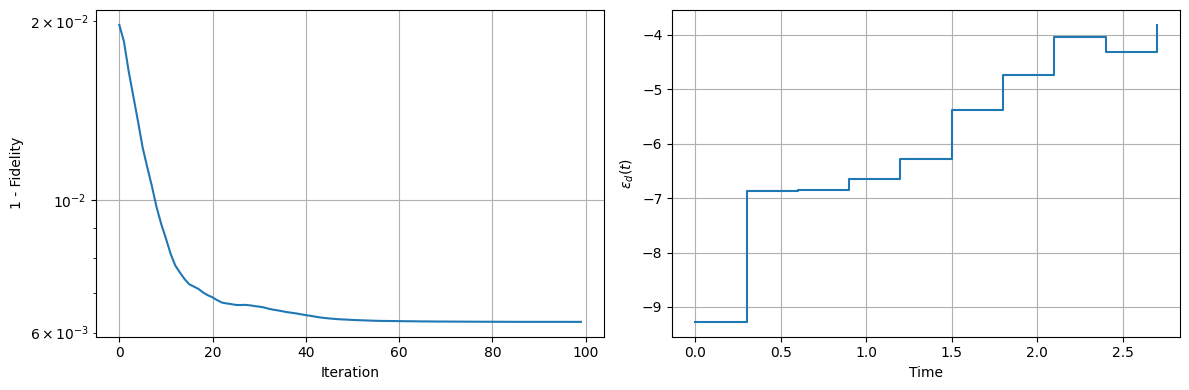

In [33]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
from jax.example_libraries.optimizers import adam
import matplotlib.pyplot as plt

# Parameters
T = 3.0
N = 10                      # Number of time bins
alpha_target = 2.0          # Target α (α² = 4)
na = 20                     # Memory mode truncation
nb = 5                      # Buffer mode truncation
g2 = 1.0                    # Two-photon coupling
kappa_b = 10                # Buffer dissipation rate

# Target state (even cat state |+⟩)
coherent_plus = dq.coherent(na, alpha_target)
coherent_minus = dq.coherent(na, -alpha_target)
cat_plus = (coherent_plus + coherent_minus).unit()

# Operators
a = dq.destroy(na)
b = dq.destroy(nb)
a_full = dq.tensor(a, dq.eye(nb))
b_full = dq.tensor(dq.eye(na), b)
H_2ph = g2 * (a_full.dag() @ a_full.dag() @ b_full) + jnp.conjugate(g2) * (a_full @ a_full @ b_full.dag())
c_ops = [jnp.sqrt(kappa_b) * b_full]

# Initial state (vacuum)
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Loss function (1 - fidelity)
def loss(epsilon_d_values):
    dt = T / N
    state = psi0
    for i in range(N):
        H_d = epsilon_d_values[i] * (b_full + b_full.dag())
        H = H_2ph + H_d
        result = dq.mesolve(H, c_ops, state, jnp.array([0.0, dt]))
        state = result.states[-1]
    rho_a = dq.ptrace(state, 0)
    return 1.0 - dq.fidelity(rho_a, cat_plus)

# Initialize optimizer
opt_init, opt_update, get_params = adam(step_size=0.1)
epsilon_d_initial = -4.0 * jnp.ones(N)  # Initial guess (constant drive)
opt_state = opt_init(epsilon_d_initial)

# JIT-compiled optimization step
@jax.jit
def step(opt_state, _):
    params = get_params(opt_state)
    loss_val, grads = jax.value_and_grad(loss)(params)
    opt_state = opt_update(0, grads, opt_state)
    return opt_state, loss_val

# Run optimization
loss_history = []
for it in range(100):
    opt_state, loss_val = step(opt_state, None)
    loss_history.append(float(loss_val))
    print(f"Iter {it:3d} | Loss: {loss_val:.4f}")

# Get optimized ε_d(t)
epsilon_d_optimized = get_params(opt_state)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss history
ax1.plot(loss_history)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('1 - Fidelity')
ax1.set_yscale('log')
ax1.grid(True)

# Plot optimized ε_d(t)
t_bins = jnp.linspace(0, T, N, endpoint=False)
ax2.step(t_bins, epsilon_d_optimized, where='post')
ax2.set_xlabel('Time')
ax2.set_ylabel('$\\epsilon_d(t)$')
ax2.grid(True)

plt.tight_layout()
plt.show()

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 310.32ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 114.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.16ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 617.72ms ◆ remaining 30.24s
|▏         |   2.0% ◆ elapsed 619.17ms ◆ remaining 30.24s
|██████████| 100.0% ◆ elapsed 688.47ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 692.02ms ◆ remaining 33.88s

|▏         |   2.0% ◆ elapsed 692.92ms ◆ remaining 33.88s

|██████████| 100.0% ◆ elapsed 747.65ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 750.80ms ◆ remaining 36.76s


|▏         |   2.0% ◆ elapsed 751.87ms ◆ remaining 36.76s


|██████████| 100.0% ◆ elapsed 814.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   0 | Loss: 0.0009


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 325.05ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 60.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.18ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 569.94ms ◆ remaining 27.90s
|▏         |   2.0% ◆ elapsed 570.91ms ◆ remaining 27.90s
|██████████| 100.0% ◆ elapsed 647.33ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 629.67ms ◆ remaining 30.82s

|▏         |   2.0% ◆ elapsed 630.67ms ◆ remaining 30.82s

|██████████| 100.0% ◆ elapsed 708.76ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 710.52ms ◆ remaining 34.79s


|▏         |   2.0% ◆ elapsed 711.50ms ◆ remaining 34.79s


|██████████| 100.0% ◆ elapsed 772.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter   1 | Loss: 0.0014


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 290.17ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 57.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.03ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 604.48ms ◆ remaining 29.59s
|▏         |   2.0% ◆ elapsed 605.49ms ◆ remaining 29.59s
|██████████| 100.0% ◆ elapsed 679.97ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 682.83ms ◆ remaining 33.43s

|▏         |   2.0% ◆ elapsed 683.84ms ◆ remaining 33.43s

|██████████| 100.0% ◆ elapsed 743.69ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 746.63ms ◆ remaining 36.55s


|▏         |   2.0% ◆ elapsed 747.64ms ◆ remaining 36.55s


|██████████| 100.0% ◆ elapsed 827.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   2 | Loss: 0.0007


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 255.97ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 58.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.95ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 564.83ms ◆ remaining 27.64s
|▏         |   2.0% ◆ elapsed 565.80ms ◆ remaining 27.64s
|██████████| 100.0% ◆ elapsed 633.11ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 635.73ms ◆ remaining 31.12s

|▏         |   2.0% ◆ elapsed 636.83ms ◆ remaining 31.12s

|██████████| 100.0% ◆ elapsed 691.22ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 693.98ms ◆ remaining 33.97s


|██████████| 100.0% ◆ elapsed 752.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ ela

Iter   3 | Loss: 0.0012


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 233.68ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 194.33ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 58.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.73ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 588.78ms ◆ remaining 28.82s
|▏         |   2.0% ◆ elapsed 589.66ms ◆ remaining 28.82s
|██████████| 100.0% ◆ elapsed 657.70ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 660.12ms ◆ remaining 32.32s

|▏         |   2.0% ◆ elapsed 660.93ms ◆ remaining 32.32s

|██████████| 100.0% ◆ elapsed 727.26ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 729.96ms ◆ remaining 35.74s


|▏         |   2.0% ◆ elapsed 731.18ms ◆ remaining 35.74s


|██████████| 100.0% ◆ elapsed 786.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.59ms ◆ remaining 0.00ms
|██████████| 100.0%

Iter   4 | Loss: 0.0008


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 300.74ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 116.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.25ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 602.98ms ◆ remaining 29.52s
|▏         |   2.0% ◆ elapsed 603.85ms ◆ remaining 29.52s
|██████████| 100.0% ◆ elapsed 662.79ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 665.98ms ◆ remaining 32.60s

|▏         |   2.0% ◆ elapsed 666.98ms ◆ remaining 32.60s

|██████████| 100.0% ◆ elapsed 737.47ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 740.99ms ◆ remaining 36.28s


|▏         |   2.0% ◆ elapsed 741.92ms ◆ remaining 36.28s


|██████████| 100.0% ◆ elapsed 807.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   5 | Loss: 0.0005


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 259.71ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 108.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.44ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 551.77ms ◆ remaining 27.00s
|▏         |   2.0% ◆ elapsed 552.99ms ◆ remaining 27.00s
|██████████| 100.0% ◆ elapsed 611.56ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 613.08ms ◆ remaining 30.01s

|▏         |   2.0% ◆ elapsed 613.97ms ◆ remaining 30.01s

|██████████| 100.0% ◆ elapsed 682.82ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 684.60ms ◆ remaining 33.52s


|▏         |   2.0% ◆ elapsed 685.48ms ◆ remaining 33.52s


|██████████| 100.0% ◆ elapsed 750.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   6 | Loss: 0.0007


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 261.22ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 128.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.53ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 574.12ms ◆ remaining 28.10s
|▏         |   2.0% ◆ elapsed 575.08ms ◆ remaining 28.10s
|██████████| 100.0% ◆ elapsed 639.79ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 642.28ms ◆ remaining 31.44s

|▏         |   2.0% ◆ elapsed 643.24ms ◆ remaining 31.44s

|██████████| 100.0% ◆ elapsed 702.33ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 698.12ms ◆ remaining 34.18s


|▏         |   2.0% ◆ elapsed 699.07ms ◆ remaining 34.18s


|██████████| 100.0% ◆ elapsed 769.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   7 | Loss: 0.0007


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 301.69ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 109.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.25ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 594.69ms ◆ remaining 29.11s
|▏         |   2.0% ◆ elapsed 595.87ms ◆ remaining 29.11s
|██████████| 100.0% ◆ elapsed 652.18ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 653.74ms ◆ remaining 32.00s

|▏         |   2.0% ◆ elapsed 654.63ms ◆ remaining 32.00s

|██████████| 100.0% ◆ elapsed 718.75ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 645.68ms ◆ remaining 31.61s


|▏         |   2.0% ◆ elapsed 646.54ms ◆ remaining 31.61s


|██████████| 100.0% ◆ elapsed 709.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 57.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter   8 | Loss: 0.0004


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 303.50ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 93.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.18ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 549.78ms ◆ remaining 26.91s
|▏         |   2.0% ◆ elapsed 550.69ms ◆ remaining 26.91s
|██████████| 100.0% ◆ elapsed 617.63ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 621.00ms ◆ remaining 30.41s

|▏         |   2.0% ◆ elapsed 621.80ms ◆ remaining 30.41s

|██████████| 100.0% ◆ elapsed 689.54ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 692.02ms ◆ remaining 33.89s


|▏         |   2.0% ◆ elapsed 692.79ms ◆ remaining 33.89s


|██████████| 100.0% ◆ elapsed 747.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter   9 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 262.66ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 87.65ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.74ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 502.79ms ◆ remaining 24.61s
|▏         |   2.0% ◆ elapsed 503.73ms ◆ remaining 24.61s
|██████████| 100.0% ◆ elapsed 575.90ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 579.58ms ◆ remaining 28.37s

|██████████| 100.0% ◆ elapsed 649.66ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 653.63ms ◆ remaining 32.00s


|▏         |   2.0% ◆ elapsed 654.56ms ◆ remaining 32.00s


|██████████| 100.0% ◆ elapsed 716.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ el

Iter  10 | Loss: 0.0005


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 275.23ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 97.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.70ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 557.60ms ◆ remaining 27.30s
|▏         |   2.0% ◆ elapsed 558.35ms ◆ remaining 27.30s
|██████████| 100.0% ◆ elapsed 614.02ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 616.14ms ◆ remaining 30.17s

|▏         |   2.0% ◆ elapsed 616.93ms ◆ remaining 30.17s

|██████████| 100.0% ◆ elapsed 681.56ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 684.35ms ◆ remaining 33.51s


|▏         |   2.0% ◆ elapsed 685.12ms ◆ remaining 33.51s


|██████████| 100.0% ◆ elapsed 735.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 53.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  11 | Loss: 0.0005


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 225.19ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.14ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 88.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.79ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 529.06ms ◆ remaining 25.90s
|▏         |   2.0% ◆ elapsed 530.16ms ◆ remaining 25.90s
|██████████| 100.0% ◆ elapsed 586.82ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 590.21ms ◆ remaining 28.90s

|▏         |   2.0% ◆ elapsed 591.08ms ◆ remaining 28.90s

|██████████| 100.0% ◆ elapsed 656.08ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 652.98ms ◆ remaining 31.98s


|▏         |   2.0% ◆ elapsed 653.90ms ◆ remaining 31.98s


|██████████| 100.0% ◆ elapsed 713.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.07ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  12 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 198.31ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 148.26ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 89.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.88ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 520.71ms ◆ remaining 25.49s
|▏         |   2.0% ◆ elapsed 521.46ms ◆ remaining 25.49s
|██████████| 100.0% ◆ elapsed 599.57ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 602.10ms ◆ remaining 29.48s

|▏         |   2.0% ◆ elapsed 602.85ms ◆ remaining 29.48s

|██████████| 100.0% ◆ elapsed 658.68ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 662.62ms ◆ remaining 32.45s


|▏         |   2.0% ◆ elapsed 663.38ms ◆ remaining 32.45s


|██████████| 100.0% ◆ elapsed 735.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.63ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  13 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 224.54ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 122.75ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 92.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.99ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 535.94ms ◆ remaining 26.24s
|▏         |   2.0% ◆ elapsed 536.72ms ◆ remaining 26.24s
|██████████| 100.0% ◆ elapsed 614.00ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 617.08ms ◆ remaining 30.22s

|▏         |   2.0% ◆ elapsed 617.86ms ◆ remaining 30.22s

|██████████| 100.0% ◆ elapsed 677.74ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 680.23ms ◆ remaining 33.31s


|▏         |   2.0% ◆ elapsed 681.24ms ◆ remaining 33.31s


|██████████| 100.0% ◆ elapsed 753.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.43ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  14 | Loss: 0.0004


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 270.96ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 105.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.64ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 539.33ms ◆ remaining 26.41s
|▏         |   2.0% ◆ elapsed 559.97ms ◆ remaining 26.41s
|██████████| 100.0% ◆ elapsed 617.67ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 619.44ms ◆ remaining 30.33s

|▏         |   2.0% ◆ elapsed 620.23ms ◆ remaining 30.33s

|██████████| 100.0% ◆ elapsed 690.68ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 692.11ms ◆ remaining 33.89s


|▏         |   2.0% ◆ elapsed 692.98ms ◆ remaining 33.89s


|██████████| 100.0% ◆ elapsed 758.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 52.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  15 | Loss: 0.0004


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 306.72ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 93.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.84ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.85ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 555.41ms ◆ remaining 27.20s
|▏         |   2.0% ◆ elapsed 556.20ms ◆ remaining 27.20s
|██████████| 100.0% ◆ elapsed 624.16ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 625.39ms ◆ remaining 30.63s

|▏         |   2.0% ◆ elapsed 626.14ms ◆ remaining 30.63s

|██████████| 100.0% ◆ elapsed 682.04ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 695.53ms ◆ remaining 34.06s


|▏         |   2.0% ◆ elapsed 696.45ms ◆ remaining 34.06s


|██████████| 100.0% ◆ elapsed 749.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  16 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 287.50ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 99.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.59ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 566.65ms ◆ remaining 27.74s
|▏         |   2.0% ◆ elapsed 567.51ms ◆ remaining 27.74s
|██████████| 100.0% ◆ elapsed 632.10ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 661.10ms ◆ remaining 32.37s

|▏         |   2.0% ◆ elapsed 661.93ms ◆ remaining 32.37s

|██████████| 100.0% ◆ elapsed 723.46ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 667.34ms ◆ remaining 32.68s


|▏         |   2.0% ◆ elapsed 668.16ms ◆ remaining 32.68s


|██████████| 100.0% ◆ elapsed 737.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  17 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 256.16ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 59.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 55.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.04ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 499.07ms ◆ remaining 24.43s
|▏         |   2.0% ◆ elapsed 500.27ms ◆ remaining 24.43s
|██████████| 100.0% ◆ elapsed 563.30ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 565.63ms ◆ remaining 27.69s

|▏         |   2.0% ◆ elapsed 566.47ms ◆ remaining 27.69s

|██████████| 100.0% ◆ elapsed 623.85ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 645.02ms ◆ remaining 31.58s


|▏         |   2.0% ◆ elapsed 645.86ms ◆ remaining 31.58s


|██████████| 100.0% ◆ elapsed 707.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  18 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 279.47ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 114.82ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 111.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 100.17ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 615.14ms ◆ remaining 30.12s
|▏         |   2.0% ◆ elapsed 615.98ms ◆ remaining 30.12s
|██████████| 100.0% ◆ elapsed 686.48ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 689.65ms ◆ remaining 33.76s

|▏         |   2.0% ◆ elapsed 690.51ms ◆ remaining 33.76s

|██████████| 100.0% ◆ elapsed 775.38ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 778.09ms ◆ remaining 38.10s


|▏         |   2.0% ◆ elapsed 778.98ms ◆ remaining 38.10s


|██████████| 100.0% ◆ elapsed 835.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.71ms ◆ remaining 0.00ms
|██████████| 100.0

Iter  19 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|▏         |   2.0% ◆ elapsed 18.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 332.44ms ◆ remaining 0.00ms

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|▏         |   2.0% ◆ elapsed 6.19ms ◆ remaining 0.00ms
|████████▌ |  85.4% ◆ elapsed 89.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.14ms ◆ remaining 0.00ms

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|▏         |   2.0% ◆ elapsed 5.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.45ms ◆ remaining 0.00ms

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|▏         |   2.0% ◆ elapsed 5.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.30ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 623.30ms ◆ remaining 30.51s

|▏         |   2.0% ◆ elapsed 624.17ms ◆ remaining 30.51s

|████

Iter  20 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 352.44ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 102.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.76ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 604.28ms ◆ remaining 29.57s
|▏         |   2.0% ◆ elapsed 605.53ms ◆ remaining 29.57s
|██████████| 100.0% ◆ elapsed 664.09ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 665.35ms ◆ remaining 32.57s

|▏         |   2.0% ◆ elapsed 666.35ms ◆ remaining 32.57s

|██████████| 100.0% ◆ elapsed 739.43ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 738.52ms ◆ remaining 36.15s


|▏         |   2.0% ◆ elapsed 739.48ms ◆ remaining 36.15s


|██████████| 100.0% ◆ elapsed 811.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  21 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 291.70ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 105.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.33ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 577.04ms ◆ remaining 28.25s
|▏         |   2.0% ◆ elapsed 577.82ms ◆ remaining 28.25s
|██████████| 100.0% ◆ elapsed 648.22ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 650.07ms ◆ remaining 31.83s

|▏         |   2.0% ◆ elapsed 650.87ms ◆ remaining 31.83s

|██████████| 100.0% ◆ elapsed 712.98ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 707.87ms ◆ remaining 34.66s


|▏         |   2.0% ◆ elapsed 708.69ms ◆ remaining 34.66s


|██████████| 100.0% ◆ elapsed 780.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  22 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 346.53ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 96.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.60ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 639.43ms ◆ remaining 31.31s
|▏         |   2.0% ◆ elapsed 640.24ms ◆ remaining 31.31s
|██████████| 100.0% ◆ elapsed 698.26ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 700.89ms ◆ remaining 34.32s

|▏         |   2.0% ◆ elapsed 701.69ms ◆ remaining 34.32s

|██████████| 100.0% ◆ elapsed 769.39ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 772.65ms ◆ remaining 37.83s


|▏         |   2.0% ◆ elapsed 773.55ms ◆ remaining 37.83s


|██████████| 100.0% ◆ elapsed 842.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  23 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 285.26ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 109.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.10ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 584.35ms ◆ remaining 28.60s
|▏         |   2.0% ◆ elapsed 585.54ms ◆ remaining 28.60s
|██████████| 100.0% ◆ elapsed 650.88ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 668.80ms ◆ remaining 32.74s

|▏         |   2.0% ◆ elapsed 669.70ms ◆ remaining 32.74s

|██████████| 100.0% ◆ elapsed 734.43ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 729.56ms ◆ remaining 35.72s


|▏         |   2.0% ◆ elapsed 730.39ms ◆ remaining 35.72s


|██████████| 100.0% ◆ elapsed 803.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  24 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 358.51ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 102.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.44ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 627.52ms ◆ remaining 30.72s
|▏         |   2.0% ◆ elapsed 649.15ms ◆ remaining 30.72s
|██████████| 100.0% ◆ elapsed 709.18ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 664.36ms ◆ remaining 32.52s

|▏         |   2.0% ◆ elapsed 665.28ms ◆ remaining 32.52s

|██████████| 100.0% ◆ elapsed 735.13ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 737.22ms ◆ remaining 36.09s


|▏         |   2.0% ◆ elapsed 738.34ms ◆ remaining 36.09s


|██████████| 100.0% ◆ elapsed 820.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  25 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 328.52ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 114.41ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 114.95ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 96.97ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 665.06ms ◆ remaining 32.56s
|▏         |   2.0% ◆ elapsed 666.27ms ◆ remaining 32.56s
|██████████| 100.0% ◆ elapsed 734.84ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 729.75ms ◆ remaining 35.73s

|▏         |   2.0% ◆ elapsed 731.41ms ◆ remaining 35.73s

|██████████| 100.0% ◆ elapsed 807.97ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 810.53ms ◆ remaining 39.68s


|▏         |   2.0% ◆ elapsed 811.76ms ◆ remaining 39.68s


|██████████| 100.0% ◆ elapsed 874.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.54ms ◆ remaining 0.00ms
|██████████| 100.0

Iter  26 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 338.56ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 97.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.01ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 639.40ms ◆ remaining 31.30s
|▏         |   2.0% ◆ elapsed 640.30ms ◆ remaining 31.30s
|██████████| 100.0% ◆ elapsed 706.26ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 708.40ms ◆ remaining 34.68s

|▏         |   2.0% ◆ elapsed 709.81ms ◆ remaining 34.68s

|██████████| 100.0% ◆ elapsed 785.28ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 788.38ms ◆ remaining 38.60s


|▏         |   2.0% ◆ elapsed 789.31ms ◆ remaining 38.60s


|██████████| 100.0% ◆ elapsed 866.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  27 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 357.70ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 69.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 83.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.27ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 687.95ms ◆ remaining 33.68s
|▏         |   2.0% ◆ elapsed 688.97ms ◆ remaining 33.68s
|██████████| 100.0% ◆ elapsed 767.75ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 768.72ms ◆ remaining 37.64s

|▏         |   2.0% ◆ elapsed 769.68ms ◆ remaining 37.64s

|██████████| 100.0% ◆ elapsed 845.54ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 725.13ms ◆ remaining 35.50s


|▏         |   2.0% ◆ elapsed 726.10ms ◆ remaining 35.50s


|██████████| 100.0% ◆ elapsed 802.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  28 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 301.93ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 134.68ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 67.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.15ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 639.71ms ◆ remaining 31.31s
|▏         |   2.0% ◆ elapsed 640.59ms ◆ remaining 31.31s
|██████████| 100.0% ◆ elapsed 716.04ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 717.22ms ◆ remaining 35.12s

|▏         |   2.0% ◆ elapsed 718.08ms ◆ remaining 35.12s

|██████████| 100.0% ◆ elapsed 783.09ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 784.23ms ◆ remaining 38.40s


|▏         |   2.0% ◆ elapsed 785.12ms ◆ remaining 38.40s


|██████████| 100.0% ◆ elapsed 843.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.93ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  29 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 292.48ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 110.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.92ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 599.61ms ◆ remaining 29.35s
|▏         |   2.0% ◆ elapsed 600.72ms ◆ remaining 29.35s
|██████████| 100.0% ◆ elapsed 686.17ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 688.03ms ◆ remaining 33.69s

|▏         |   2.0% ◆ elapsed 688.90ms ◆ remaining 33.69s

|██████████| 100.0% ◆ elapsed 753.71ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 755.50ms ◆ remaining 37.00s


|▏         |   2.0% ◆ elapsed 756.37ms ◆ remaining 37.00s


|██████████| 100.0% ◆ elapsed 829.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  30 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 237.76ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 71.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.05ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 580.66ms ◆ remaining 28.43s
|▏         |   2.0% ◆ elapsed 581.48ms ◆ remaining 28.43s
|██████████| 100.0% ◆ elapsed 655.00ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 658.65ms ◆ remaining 32.25s

|▏         |   2.0% ◆ elapsed 659.49ms ◆ remaining 32.25s

|██████████| 100.0% ◆ elapsed 734.31ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 736.98ms ◆ remaining 36.09s


|▏         |   2.0% ◆ elapsed 737.84ms ◆ remaining 36.09s


|██████████| 100.0% ◆ elapsed 792.75ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  31 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 317.29ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.38ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.68ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.53ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 602.00ms ◆ remaining 29.47s
|▏         |   2.0% ◆ elapsed 602.89ms ◆ remaining 29.47s
|██████████| 100.0% ◆ elapsed 665.19ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 666.74ms ◆ remaining 32.65s

|▏         |   2.0% ◆ elapsed 667.53ms ◆ remaining 32.65s

|██████████| 100.0% ◆ elapsed 737.03ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 738.95ms ◆ remaining 36.19s


|▏         |   2.0% ◆ elapsed 739.91ms ◆ remaining 36.19s


|██████████| 100.0% ◆ elapsed 808.18ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  32 | Loss: 0.0003


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 260.68ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 110.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.38ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 562.69ms ◆ remaining 27.54s
|▏         |   2.0% ◆ elapsed 563.53ms ◆ remaining 27.54s
|██████████| 100.0% ◆ elapsed 638.75ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 641.78ms ◆ remaining 31.42s

|▏         |   2.0% ◆ elapsed 642.60ms ◆ remaining 31.42s

|██████████| 100.0% ◆ elapsed 698.78ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 701.27ms ◆ remaining 34.34s


|▏         |   2.0% ◆ elapsed 702.03ms ◆ remaining 34.34s


|██████████| 100.0% ◆ elapsed 768.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  33 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 285.15ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.30ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 574.71ms ◆ remaining 28.14s
|▏         |   2.0% ◆ elapsed 575.59ms ◆ remaining 28.14s
|██████████| 100.0% ◆ elapsed 630.68ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 633.47ms ◆ remaining 31.02s

|▏         |   2.0% ◆ elapsed 634.29ms ◆ remaining 31.02s

|██████████| 100.0% ◆ elapsed 696.51ms ◆ remaining 0.00ms  



|▏         |   2.0% ◆ elapsed 700.00ms ◆ remaining 34.27s


|▏         |   2.0% ◆ elapsed 700.85ms ◆ remaining 34.27s


|██████████| 100.0% ◆ elapsed 766.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.37ms ◆ remaining 0.00ms
|██████████| 100.0%

Iter  34 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 253.68ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 134.16ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 90.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.76ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 560.18ms ◆ remaining 27.43s
|▏         |   2.0% ◆ elapsed 561.16ms ◆ remaining 27.43s
|██████████| 100.0% ◆ elapsed 639.16ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 643.10ms ◆ remaining 31.47s

|▏         |   2.0% ◆ elapsed 644.03ms ◆ remaining 31.47s

|██████████| 100.0% ◆ elapsed 707.95ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 710.75ms ◆ remaining 34.80s


|▏         |   2.0% ◆ elapsed 711.81ms ◆ remaining 34.80s


|██████████| 100.0% ◆ elapsed 771.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.53ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  35 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 269.44ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.70ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 567.25ms ◆ remaining 27.77s
|▏         |   2.0% ◆ elapsed 568.12ms ◆ remaining 27.77s
|██████████| 100.0% ◆ elapsed 625.46ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 638.68ms ◆ remaining 30.71s

|▏         |   2.0% ◆ elapsed 639.78ms ◆ remaining 30.71s

|██████████| 100.0% ◆ elapsed 697.11ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 699.92ms ◆ remaining 34.27s


|▏         |   2.0% ◆ elapsed 700.78ms ◆ remaining 34.27s


|██████████| 100.0% ◆ elapsed 765.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  36 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 268.52ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 129.97ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 89.15ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.67ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 584.00ms ◆ remaining 28.59s
|▏         |   2.0% ◆ elapsed 584.79ms ◆ remaining 28.59s
|██████████| 100.0% ◆ elapsed 653.25ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 656.29ms ◆ remaining 32.14s

|▏         |   2.0% ◆ elapsed 657.06ms ◆ remaining 32.14s

|██████████| 100.0% ◆ elapsed 710.89ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 712.95ms ◆ remaining 34.91s


|▏         |   2.0% ◆ elapsed 713.81ms ◆ remaining 34.91s


|██████████| 100.0% ◆ elapsed 778.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.00ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  37 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 326.37ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 92.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.21ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 609.80ms ◆ remaining 29.85s
|▏         |   2.0% ◆ elapsed 610.65ms ◆ remaining 29.85s
|██████████| 100.0% ◆ elapsed 667.53ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 669.51ms ◆ remaining 32.78s

|▏         |   2.0% ◆ elapsed 670.32ms ◆ remaining 32.78s

|██████████| 100.0% ◆ elapsed 743.72ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 746.04ms ◆ remaining 36.53s


|▏         |   2.0% ◆ elapsed 746.93ms ◆ remaining 36.53s


|██████████| 100.0% ◆ elapsed 813.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 56.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  38 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 305.36ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.14ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 603.91ms ◆ remaining 29.57s
|▏         |   2.0% ◆ elapsed 604.89ms ◆ remaining 29.57s
|██████████| 100.0% ◆ elapsed 657.17ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 658.40ms ◆ remaining 32.24s

|▏         |   2.0% ◆ elapsed 659.28ms ◆ remaining 32.24s

|██████████| 100.0% ◆ elapsed 722.77ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 725.11ms ◆ remaining 35.50s


|▏         |   2.0% ◆ elapsed 726.50ms ◆ remaining 35.50s


|██████████| 100.0% ◆ elapsed 791.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  39 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 305.13ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 91.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.72ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 562.63ms ◆ remaining 27.54s
|▏         |   2.0% ◆ elapsed 563.49ms ◆ remaining 27.54s
|██████████| 100.0% ◆ elapsed 639.90ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 642.81ms ◆ remaining 31.47s

|▏         |   2.0% ◆ elapsed 643.64ms ◆ remaining 31.47s

|██████████| 100.0% ◆ elapsed 709.79ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 713.13ms ◆ remaining 34.92s


|▏         |   2.0% ◆ elapsed 714.04ms ◆ remaining 34.92s


|██████████| 100.0% ◆ elapsed 767.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.92ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  40 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 295.18ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 118.63ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 86.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.31ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 604.11ms ◆ remaining 29.58s
|▏         |   2.0% ◆ elapsed 604.88ms ◆ remaining 29.58s
|██████████| 100.0% ◆ elapsed 682.02ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 685.02ms ◆ remaining 33.54s

|▏         |   2.0% ◆ elapsed 685.91ms ◆ remaining 33.54s

|██████████| 100.0% ◆ elapsed 747.18ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 750.12ms ◆ remaining 36.73s


|▏         |   2.0% ◆ elapsed 750.91ms ◆ remaining 36.73s


|██████████| 100.0% ◆ elapsed 820.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.35ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  41 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 249.45ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 135.95ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 93.49ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.74ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 570.16ms ◆ remaining 27.91s
|▏         |   2.0% ◆ elapsed 571.18ms ◆ remaining 27.91s
|██████████| 100.0% ◆ elapsed 642.49ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 629.33ms ◆ remaining 30.81s

|▏         |   2.0% ◆ elapsed 630.28ms ◆ remaining 30.81s

|██████████| 100.0% ◆ elapsed 702.99ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 705.30ms ◆ remaining 34.53s


|▏         |   2.0% ◆ elapsed 706.47ms ◆ remaining 34.53s


|██████████| 100.0% ◆ elapsed 766.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.54ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  42 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 224.41ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 146.35ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 100.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.19ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 583.54ms ◆ remaining 28.57s
|▏         |   2.0% ◆ elapsed 584.76ms ◆ remaining 28.57s
|██████████| 100.0% ◆ elapsed 665.71ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 668.14ms ◆ remaining 32.71s

|▏         |   2.0% ◆ elapsed 669.14ms ◆ remaining 32.71s

|██████████| 100.0% ◆ elapsed 743.56ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 735.84ms ◆ remaining 36.03s


|▏         |   2.0% ◆ elapsed 736.78ms ◆ remaining 36.03s


|██████████| 100.0% ◆ elapsed 803.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.37ms ◆ remaining 0.00ms
|██████████| 100.0

Iter  43 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 332.24ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.03ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.99ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 637.77ms ◆ remaining 31.22s
|▏         |   2.0% ◆ elapsed 638.73ms ◆ remaining 31.22s
|██████████| 100.0% ◆ elapsed 705.19ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 706.35ms ◆ remaining 34.59s

|▏         |   2.0% ◆ elapsed 707.22ms ◆ remaining 34.59s

|██████████| 100.0% ◆ elapsed 764.58ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 761.03ms ◆ remaining 37.26s


|▏         |   2.0% ◆ elapsed 770.86ms ◆ remaining 37.26s


|██████████| 100.0% ◆ elapsed 826.85ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.53ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  44 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 265.95ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 113.12ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 86.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.82ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 566.22ms ◆ remaining 27.71s
|▏         |   2.0% ◆ elapsed 567.14ms ◆ remaining 27.71s
|██████████| 100.0% ◆ elapsed 626.44ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 627.81ms ◆ remaining 30.73s

|▏         |   2.0% ◆ elapsed 628.78ms ◆ remaining 30.73s

|██████████| 100.0% ◆ elapsed 696.65ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 698.82ms ◆ remaining 34.21s


|▏         |   2.0% ◆ elapsed 699.70ms ◆ remaining 34.21s


|██████████| 100.0% ◆ elapsed 764.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.44ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  45 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 378.31ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 102.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.48ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 683.52ms ◆ remaining 33.46s
|▏         |   2.0% ◆ elapsed 684.46ms ◆ remaining 33.46s
|██████████| 100.0% ◆ elapsed 746.65ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 750.25ms ◆ remaining 36.74s

|▏         |   2.0% ◆ elapsed 751.08ms ◆ remaining 36.74s

|██████████| 100.0% ◆ elapsed 829.55ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 832.20ms ◆ remaining 40.75s


|▏         |   2.0% ◆ elapsed 833.06ms ◆ remaining 40.75s


|██████████| 100.0% ◆ elapsed 907.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.13ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  46 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 341.46ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 72.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.55ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 707.22ms ◆ remaining 34.62s
|▏         |   2.0% ◆ elapsed 708.16ms ◆ remaining 34.62s
|██████████| 100.0% ◆ elapsed 769.68ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 766.46ms ◆ remaining 37.53s

|▏         |   2.0% ◆ elapsed 767.30ms ◆ remaining 37.53s

|██████████| 100.0% ◆ elapsed 845.23ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 752.62ms ◆ remaining 36.85s


|▏         |   2.0% ◆ elapsed 753.66ms ◆ remaining 36.85s


|██████████| 100.0% ◆ elapsed 828.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  47 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 348.91ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 74.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 99.53ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 691.07ms ◆ remaining 33.83s
|▏         |   2.0% ◆ elapsed 692.24ms ◆ remaining 33.83s
|██████████| 100.0% ◆ elapsed 771.50ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 764.21ms ◆ remaining 37.41s

|▏         |   2.0% ◆ elapsed 765.13ms ◆ remaining 37.41s

|██████████| 100.0% ◆ elapsed 837.46ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 839.51ms ◆ remaining 41.10s


|▏         |   2.0% ◆ elapsed 840.96ms ◆ remaining 41.10s


|██████████| 100.0% ◆ elapsed 914.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  48 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 370.89ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.95ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 673.00ms ◆ remaining 32.95s
|▏         |   2.0% ◆ elapsed 673.91ms ◆ remaining 32.95s
|██████████| 100.0% ◆ elapsed 751.04ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 712.13ms ◆ remaining 34.86s

|▏         |   2.0% ◆ elapsed 713.02ms ◆ remaining 34.86s

|██████████| 100.0% ◆ elapsed 777.46ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 794.68ms ◆ remaining 38.90s


|▏         |   2.0% ◆ elapsed 795.95ms ◆ remaining 38.90s


|██████████| 100.0% ◆ elapsed 862.52ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  49 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 413.77ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 115.43ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 88.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 82.51ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 708.95ms ◆ remaining 34.71s
|▏         |   2.0% ◆ elapsed 709.95ms ◆ remaining 34.71s
|██████████| 100.0% ◆ elapsed 783.27ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 785.43ms ◆ remaining 38.46s

|▏         |   2.0% ◆ elapsed 786.54ms ◆ remaining 38.46s

|██████████| 100.0% ◆ elapsed 847.06ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 776.69ms ◆ remaining 38.02s


|▏         |   2.0% ◆ elapsed 777.72ms ◆ remaining 38.02s


|██████████| 100.0% ◆ elapsed 843.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.19ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  50 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 347.21ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 101.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.07ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 651.64ms ◆ remaining 31.90s
|▏         |   2.0% ◆ elapsed 652.88ms ◆ remaining 31.90s
|██████████| 100.0% ◆ elapsed 730.83ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 711.15ms ◆ remaining 34.82s

|▏         |   2.0% ◆ elapsed 712.26ms ◆ remaining 34.82s

|██████████| 100.0% ◆ elapsed 773.01ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 775.02ms ◆ remaining 37.95s


|▏         |   2.0% ◆ elapsed 776.14ms ◆ remaining 37.95s


|██████████| 100.0% ◆ elapsed 847.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 63.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  51 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 324.16ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 96.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 83.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.26ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 598.87ms ◆ remaining 29.31s
|▏         |   2.0% ◆ elapsed 599.77ms ◆ remaining 29.31s
|██████████| 100.0% ◆ elapsed 656.31ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 658.41ms ◆ remaining 32.23s

|▏         |   2.0% ◆ elapsed 659.20ms ◆ remaining 32.23s

|██████████| 100.0% ◆ elapsed 734.07ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 737.00ms ◆ remaining 36.08s


|▏         |   2.0% ◆ elapsed 737.90ms ◆ remaining 36.08s


|██████████| 100.0% ◆ elapsed 811.54ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  52 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 283.66ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 83.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.71ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 542.66ms ◆ remaining 26.56s
|▏         |   2.0% ◆ elapsed 543.50ms ◆ remaining 26.56s
|██████████| 100.0% ◆ elapsed 599.73ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 559.33ms ◆ remaining 27.38s

|▏         |   2.0% ◆ elapsed 560.26ms ◆ remaining 27.38s

|██████████| 100.0% ◆ elapsed 627.81ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 629.31ms ◆ remaining 30.82s


|▏         |   2.0% ◆ elapsed 630.14ms ◆ remaining 30.82s


|██████████| 100.0% ◆ elapsed 696.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  53 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 258.14ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 113.83ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 88.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.34ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 556.13ms ◆ remaining 27.23s
|▏         |   2.0% ◆ elapsed 556.99ms ◆ remaining 27.23s
|██████████| 100.0% ◆ elapsed 628.47ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 630.40ms ◆ remaining 30.86s

|▏         |   2.0% ◆ elapsed 631.33ms ◆ remaining 30.86s

|██████████| 100.0% ◆ elapsed 687.01ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 689.53ms ◆ remaining 33.76s


|▏         |   2.0% ◆ elapsed 690.37ms ◆ remaining 33.76s


|██████████| 100.0% ◆ elapsed 758.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.93ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  54 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 264.09ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 119.15ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 88.31ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 94.80ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 576.97ms ◆ remaining 28.24s
|▏         |   2.0% ◆ elapsed 578.12ms ◆ remaining 28.24s
|██████████| 100.0% ◆ elapsed 656.92ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 658.78ms ◆ remaining 32.25s

|▏         |   2.0% ◆ elapsed 660.24ms ◆ remaining 32.25s

|██████████| 100.0% ◆ elapsed 740.87ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 715.78ms ◆ remaining 35.05s


|▏         |   2.0% ◆ elapsed 717.21ms ◆ remaining 35.05s


|██████████| 100.0% ◆ elapsed 771.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.08ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  55 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 316.98ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 85.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.00ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 579.84ms ◆ remaining 28.38s
|▏         |   2.0% ◆ elapsed 580.99ms ◆ remaining 28.38s
|██████████| 100.0% ◆ elapsed 646.08ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 648.05ms ◆ remaining 31.73s

|▏         |   2.0% ◆ elapsed 649.16ms ◆ remaining 31.73s

|██████████| 100.0% ◆ elapsed 720.77ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 724.15ms ◆ remaining 35.45s


|▏         |   2.0% ◆ elapsed 725.27ms ◆ remaining 35.45s


|██████████| 100.0% ◆ elapsed 799.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  56 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 296.68ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 103.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 83.96ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.16ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 570.40ms ◆ remaining 27.92s
|▏         |   2.0% ◆ elapsed 571.42ms ◆ remaining 27.92s
|██████████| 100.0% ◆ elapsed 649.43ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 652.67ms ◆ remaining 31.95s

|▏         |   2.0% ◆ elapsed 653.69ms ◆ remaining 31.95s

|██████████| 100.0% ◆ elapsed 710.54ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 712.97ms ◆ remaining 34.91s


|▏         |   2.0% ◆ elapsed 713.84ms ◆ remaining 34.91s


|██████████| 100.0% ◆ elapsed 777.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  57 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 229.97ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 103.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 56.08ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 485.71ms ◆ remaining 23.78s
|▏         |   2.0% ◆ elapsed 486.55ms ◆ remaining 23.78s
|██████████| 100.0% ◆ elapsed 562.87ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 565.43ms ◆ remaining 27.68s

|▏         |   2.0% ◆ elapsed 566.27ms ◆ remaining 27.68s

|██████████| 100.0% ◆ elapsed 630.97ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 633.77ms ◆ remaining 31.03s


|▏         |   2.0% ◆ elapsed 634.63ms ◆ remaining 31.03s


|██████████| 100.0% ◆ elapsed 688.64ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  58 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 289.11ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.07ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.40ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 579.94ms ◆ remaining 28.39s
|▏         |   2.0% ◆ elapsed 580.76ms ◆ remaining 28.39s
|██████████| 100.0% ◆ elapsed 641.43ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 644.75ms ◆ remaining 31.57s

|▏         |   2.0% ◆ elapsed 645.52ms ◆ remaining 31.57s

|██████████| 100.0% ◆ elapsed 717.96ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 721.11ms ◆ remaining 35.30s


|▏         |   2.0% ◆ elapsed 722.25ms ◆ remaining 35.30s


|██████████| 100.0% ◆ elapsed 783.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 77.20ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  59 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 323.31ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.71ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.76ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 611.56ms ◆ remaining 29.94s
|▏         |   2.0% ◆ elapsed 612.36ms ◆ remaining 29.94s
|██████████| 100.0% ◆ elapsed 671.45ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 674.22ms ◆ remaining 33.02s

|▏         |   2.0% ◆ elapsed 675.00ms ◆ remaining 33.02s

|██████████| 100.0% ◆ elapsed 739.89ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 741.67ms ◆ remaining 36.32s


|▏         |   2.0% ◆ elapsed 742.42ms ◆ remaining 36.32s


|██████████| 100.0% ◆ elapsed 808.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 55.46ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  60 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 289.55ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 109.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.71ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 589.90ms ◆ remaining 28.88s
|▏         |   2.0% ◆ elapsed 590.77ms ◆ remaining 28.88s
|██████████| 100.0% ◆ elapsed 662.75ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 665.59ms ◆ remaining 32.59s

|▏         |   2.0% ◆ elapsed 666.63ms ◆ remaining 32.59s

|██████████| 100.0% ◆ elapsed 724.77ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 727.98ms ◆ remaining 35.65s


|▏         |   2.0% ◆ elapsed 728.78ms ◆ remaining 35.65s


|██████████| 100.0% ◆ elapsed 805.28ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  61 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 293.71ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 67.37ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 129.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.80ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 640.72ms ◆ remaining 30.04s
|▏         |   2.0% ◆ elapsed 641.81ms ◆ remaining 30.04s
|██████████| 100.0% ◆ elapsed 711.43ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 714.19ms ◆ remaining 34.97s

|▏         |   2.0% ◆ elapsed 715.07ms ◆ remaining 34.97s

|██████████| 100.0% ◆ elapsed 796.91ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 799.57ms ◆ remaining 39.16s


|▏         |   2.0% ◆ elapsed 800.30ms ◆ remaining 39.16s


|██████████| 100.0% ◆ elapsed 874.05ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  62 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 290.67ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 131.36ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 84.86ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.07ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 618.07ms ◆ remaining 30.25s
|▏         |   2.0% ◆ elapsed 618.95ms ◆ remaining 30.25s
|██████████| 100.0% ◆ elapsed 697.36ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 700.18ms ◆ remaining 34.27s

|▏         |   2.0% ◆ elapsed 701.03ms ◆ remaining 34.27s

|██████████| 100.0% ◆ elapsed 772.21ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 775.19ms ◆ remaining 37.95s


|▏         |   2.0% ◆ elapsed 776.25ms ◆ remaining 37.95s


|██████████| 100.0% ◆ elapsed 837.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.02ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  63 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 398.77ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 95.45ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.59ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 68.31ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 694.56ms ◆ remaining 34.00s
|▏         |   2.0% ◆ elapsed 695.65ms ◆ remaining 34.00s
|██████████| 100.0% ◆ elapsed 758.76ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 759.91ms ◆ remaining 37.20s

|▏         |   2.0% ◆ elapsed 761.03ms ◆ remaining 37.20s

|██████████| 100.0% ◆ elapsed 837.18ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 839.83ms ◆ remaining 41.12s


|▏         |   2.0% ◆ elapsed 840.81ms ◆ remaining 41.12s


|██████████| 100.0% ◆ elapsed 915.00ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  64 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 301.16ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 141.96ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 66.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.93ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 644.82ms ◆ remaining 31.57s
|▏         |   2.0% ◆ elapsed 645.61ms ◆ remaining 31.57s
|██████████| 100.0% ◆ elapsed 727.10ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 728.74ms ◆ remaining 35.68s

|▏         |   2.0% ◆ elapsed 729.59ms ◆ remaining 35.68s

|██████████| 100.0% ◆ elapsed 809.72ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 743.58ms ◆ remaining 36.41s


|▏         |   2.0% ◆ elapsed 744.51ms ◆ remaining 36.41s


|██████████| 100.0% ◆ elapsed 815.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.98ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  65 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 360.22ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 94.06ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 105.83ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 661.62ms ◆ remaining 32.40s
|▏         |   2.0% ◆ elapsed 662.55ms ◆ remaining 32.40s
|██████████| 100.0% ◆ elapsed 736.35ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 739.03ms ◆ remaining 36.18s

|▏         |   2.0% ◆ elapsed 739.94ms ◆ remaining 36.18s

|██████████| 100.0% ◆ elapsed 801.28ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 803.76ms ◆ remaining 39.35s


|▏         |   2.0% ◆ elapsed 804.75ms ◆ remaining 39.35s


|██████████| 100.0% ◆ elapsed 874.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  66 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 364.87ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 90.72ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.68ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 623.42ms ◆ remaining 30.52s
|▏         |   2.0% ◆ elapsed 624.48ms ◆ remaining 30.52s
|██████████| 100.0% ◆ elapsed 705.23ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 707.09ms ◆ remaining 34.62s

|▏         |   2.0% ◆ elapsed 707.95ms ◆ remaining 34.62s

|██████████| 100.0% ◆ elapsed 776.24ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 726.85ms ◆ remaining 35.58s


|▏         |   2.0% ◆ elapsed 727.73ms ◆ remaining 35.58s


|██████████| 100.0% ◆ elapsed 784.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  67 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 333.27ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 96.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.78ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 623.91ms ◆ remaining 30.54s
|▏         |   2.0% ◆ elapsed 624.81ms ◆ remaining 30.54s
|██████████| 100.0% ◆ elapsed 686.13ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 683.18ms ◆ remaining 33.44s

|▏         |   2.0% ◆ elapsed 684.18ms ◆ remaining 33.44s

|██████████| 100.0% ◆ elapsed 763.00ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 764.56ms ◆ remaining 37.44s


|▏         |   2.0% ◆ elapsed 765.37ms ◆ remaining 37.44s


|██████████| 100.0% ◆ elapsed 843.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 73.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  68 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 322.74ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.26ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.94ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 612.48ms ◆ remaining 28.81s
|▏         |   2.0% ◆ elapsed 613.75ms ◆ remaining 28.81s
|██████████| 100.0% ◆ elapsed 672.96ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 663.61ms ◆ remaining 32.49s

|▏         |   2.0% ◆ elapsed 664.47ms ◆ remaining 32.49s

|██████████| 100.0% ◆ elapsed 741.28ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 742.70ms ◆ remaining 36.37s


|▏         |   2.0% ◆ elapsed 743.55ms ◆ remaining 36.37s


|██████████| 100.0% ◆ elapsed 817.91ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 59.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  69 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 338.21ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 119.68ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 103.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.69ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 647.39ms ◆ remaining 31.69s
|▏         |   2.0% ◆ elapsed 648.20ms ◆ remaining 31.69s
|██████████| 100.0% ◆ elapsed 721.79ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 723.83ms ◆ remaining 35.44s

|▏         |   2.0% ◆ elapsed 724.79ms ◆ remaining 35.44s

|██████████| 100.0% ◆ elapsed 782.36ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 794.22ms ◆ remaining 38.88s


|▏         |   2.0% ◆ elapsed 795.33ms ◆ remaining 38.88s


|██████████| 100.0% ◆ elapsed 856.47ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.40ms ◆ remaining 0.00ms
|██████████| 100.0%

Iter  70 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 357.22ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 116.87ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 87.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.02ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 659.40ms ◆ remaining 32.28s
|▏         |   2.0% ◆ elapsed 660.36ms ◆ remaining 32.28s
|██████████| 100.0% ◆ elapsed 720.23ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 722.54ms ◆ remaining 35.37s

|▏         |   2.0% ◆ elapsed 723.56ms ◆ remaining 35.37s

|██████████| 100.0% ◆ elapsed 790.06ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 787.28ms ◆ remaining 38.55s


|▏         |   2.0% ◆ elapsed 788.40ms ◆ remaining 38.55s


|██████████| 100.0% ◆ elapsed 853.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.60ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  71 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 317.53ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 130.72ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 98.18ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.93ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 646.46ms ◆ remaining 31.64s
|▏         |   2.0% ◆ elapsed 647.33ms ◆ remaining 31.64s
|██████████| 100.0% ◆ elapsed 710.11ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 711.50ms ◆ remaining 34.83s

|▏         |   2.0% ◆ elapsed 712.49ms ◆ remaining 34.83s

|██████████| 100.0% ◆ elapsed 778.84ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 780.86ms ◆ remaining 38.23s


|▏         |   2.0% ◆ elapsed 781.94ms ◆ remaining 38.23s


|██████████| 100.0% ◆ elapsed 837.44ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 69.49ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  72 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 325.01ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 87.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.69ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 613.24ms ◆ remaining 30.02s
|▏         |   2.0% ◆ elapsed 614.05ms ◆ remaining 30.02s
|██████████| 100.0% ◆ elapsed 669.98ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 673.20ms ◆ remaining 32.96s

|▏         |   2.0% ◆ elapsed 674.20ms ◆ remaining 32.96s

|██████████| 100.0% ◆ elapsed 745.98ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 748.87ms ◆ remaining 36.67s


|▏         |   2.0% ◆ elapsed 750.12ms ◆ remaining 36.67s


|██████████| 100.0% ◆ elapsed 830.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.34ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  73 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 323.60ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 120.11ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 98.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 102.90ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 654.27ms ◆ remaining 32.03s
|▏         |   2.0% ◆ elapsed 655.33ms ◆ remaining 32.03s
|██████████| 100.0% ◆ elapsed 748.84ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 749.91ms ◆ remaining 36.72s

|▏         |   2.0% ◆ elapsed 750.69ms ◆ remaining 36.72s

|██████████| 100.0% ◆ elapsed 826.23ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 828.22ms ◆ remaining 40.56s


|▏         |   2.0% ◆ elapsed 829.07ms ◆ remaining 40.56s


|██████████| 100.0% ◆ elapsed 896.09ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.59ms ◆ remaining 0.00ms
|██████████| 100.0%

Iter  74 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 322.41ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 99.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 92.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.67ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 608.59ms ◆ remaining 29.79s
|▏         |   2.0% ◆ elapsed 609.50ms ◆ remaining 29.79s
|██████████| 100.0% ◆ elapsed 695.96ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 700.22ms ◆ remaining 34.28s

|▏         |   2.0% ◆ elapsed 701.19ms ◆ remaining 34.28s

|██████████| 100.0% ◆ elapsed 765.25ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 768.16ms ◆ remaining 37.62s


|▏         |   2.0% ◆ elapsed 768.96ms ◆ remaining 37.62s


|██████████| 100.0% ◆ elapsed 834.21ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 64.16ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  75 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 283.94ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 106.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 83.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 83.03ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 566.74ms ◆ remaining 27.74s
|▏         |   2.0% ◆ elapsed 567.66ms ◆ remaining 27.74s
|██████████| 100.0% ◆ elapsed 629.17ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 632.50ms ◆ remaining 30.97s

|▏         |   2.0% ◆ elapsed 633.68ms ◆ remaining 30.97s

|██████████| 100.0% ◆ elapsed 708.15ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 710.96ms ◆ remaining 34.81s


|▏         |   2.0% ◆ elapsed 712.15ms ◆ remaining 34.81s


|██████████| 100.0% ◆ elapsed 784.66ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  76 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 262.37ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 62.08ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.98ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.46ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 587.07ms ◆ remaining 28.74s
|▏         |   2.0% ◆ elapsed 588.12ms ◆ remaining 28.74s
|██████████| 100.0% ◆ elapsed 662.55ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 645.40ms ◆ remaining 31.60s

|▏         |   2.0% ◆ elapsed 646.19ms ◆ remaining 31.60s

|██████████| 100.0% ◆ elapsed 718.83ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 721.62ms ◆ remaining 35.33s


|▏         |   2.0% ◆ elapsed 722.52ms ◆ remaining 35.33s


|██████████| 100.0% ◆ elapsed 782.70ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.79ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  77 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 325.73ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 94.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.58ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 103.47ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 622.80ms ◆ remaining 30.49s
|▏         |   2.0% ◆ elapsed 623.78ms ◆ remaining 30.49s
|██████████| 100.0% ◆ elapsed 677.82ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 680.76ms ◆ remaining 33.33s

|▏         |   2.0% ◆ elapsed 681.90ms ◆ remaining 33.33s

|██████████| 100.0% ◆ elapsed 749.59ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 749.54ms ◆ remaining 36.70s


|▏         |   2.0% ◆ elapsed 750.48ms ◆ remaining 36.70s


|██████████| 100.0% ◆ elapsed 830.90ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  78 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 306.42ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 92.02ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.12ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 558.77ms ◆ remaining 27.35s
|▏         |   2.0% ◆ elapsed 559.61ms ◆ remaining 27.35s
|██████████| 100.0% ◆ elapsed 635.41ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 638.04ms ◆ remaining 31.24s

|▏         |   2.0% ◆ elapsed 638.83ms ◆ remaining 31.24s

|██████████| 100.0% ◆ elapsed 707.81ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 710.18ms ◆ remaining 34.77s


|▏         |   2.0% ◆ elapsed 711.06ms ◆ remaining 34.77s


|██████████| 100.0% ◆ elapsed 766.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 65.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  79 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 319.72ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 98.29ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 101.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.08ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 622.51ms ◆ remaining 30.48s
|▏         |   2.0% ◆ elapsed 623.31ms ◆ remaining 30.48s
|██████████| 100.0% ◆ elapsed 701.35ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 704.72ms ◆ remaining 34.50s

|▏         |   2.0% ◆ elapsed 705.58ms ◆ remaining 34.50s

|██████████| 100.0% ◆ elapsed 768.74ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 783.36ms ◆ remaining 37.82s


|▏         |   2.0% ◆ elapsed 784.52ms ◆ remaining 37.82s


|██████████| 100.0% ◆ elapsed 847.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  80 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 253.59ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 135.70ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 93.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 85.65ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 585.41ms ◆ remaining 28.66s
|▏         |   2.0% ◆ elapsed 586.34ms ◆ remaining 28.66s
|██████████| 100.0% ◆ elapsed 661.46ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 664.17ms ◆ remaining 32.52s

|▏         |   2.0% ◆ elapsed 665.17ms ◆ remaining 32.52s

|██████████| 100.0% ◆ elapsed 735.07ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 738.41ms ◆ remaining 36.16s


|▏         |   2.0% ◆ elapsed 739.21ms ◆ remaining 36.16s


|██████████| 100.0% ◆ elapsed 800.01ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.76ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  81 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 326.25ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 123.32ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 89.78ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.80ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 638.59ms ◆ remaining 31.26s
|▏         |   2.0% ◆ elapsed 639.50ms ◆ remaining 31.26s
|██████████| 100.0% ◆ elapsed 708.51ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 711.12ms ◆ remaining 34.82s

|▏         |   2.0% ◆ elapsed 711.98ms ◆ remaining 34.82s

|██████████| 100.0% ◆ elapsed 770.44ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 772.30ms ◆ remaining 37.82s


|▏         |   2.0% ◆ elapsed 773.19ms ◆ remaining 37.82s


|██████████| 100.0% ◆ elapsed 834.04ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.62ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  82 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 342.29ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 91.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 97.43ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.34ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 603.05ms ◆ remaining 29.52s
|▏         |   2.0% ◆ elapsed 603.93ms ◆ remaining 29.52s
|██████████| 100.0% ◆ elapsed 682.60ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 684.79ms ◆ remaining 33.53s

|▏         |   2.0% ◆ elapsed 685.63ms ◆ remaining 33.53s

|██████████| 100.0% ◆ elapsed 754.36ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 756.47ms ◆ remaining 37.04s


|▏         |   2.0% ◆ elapsed 757.26ms ◆ remaining 37.04s


|██████████| 100.0% ◆ elapsed 814.87ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.33ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  83 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 336.82ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 93.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.35ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.92ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 604.25ms ◆ remaining 29.58s
|▏         |   2.0% ◆ elapsed 605.26ms ◆ remaining 29.58s
|██████████| 100.0% ◆ elapsed 665.61ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 667.12ms ◆ remaining 32.66s

|▏         |   2.0% ◆ elapsed 668.01ms ◆ remaining 32.66s

|██████████| 100.0% ◆ elapsed 741.91ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 743.93ms ◆ remaining 36.42s


|▏         |   2.0% ◆ elapsed 744.90ms ◆ remaining 36.42s


|██████████| 100.0% ◆ elapsed 804.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 60.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  84 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 302.88ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 99.89ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.76ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.51ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 589.25ms ◆ remaining 28.84s
|▏         |   2.0% ◆ elapsed 590.28ms ◆ remaining 28.84s
|██████████| 100.0% ◆ elapsed 654.50ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 673.23ms ◆ remaining 32.95s

|▏         |   2.0% ◆ elapsed 674.14ms ◆ remaining 32.95s

|██████████| 100.0% ◆ elapsed 738.47ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 741.17ms ◆ remaining 36.29s


|▏         |   2.0% ◆ elapsed 742.14ms ◆ remaining 36.29s


|██████████| 100.0% ◆ elapsed 813.61ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 71.27ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  85 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 334.56ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 103.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.99ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.65ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 628.00ms ◆ remaining 30.75s
|▏         |   2.0% ◆ elapsed 628.80ms ◆ remaining 30.75s
|██████████| 100.0% ◆ elapsed 706.37ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 707.27ms ◆ remaining 34.63s

|▏         |   2.0% ◆ elapsed 708.10ms ◆ remaining 34.63s

|██████████| 100.0% ◆ elapsed 767.77ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 769.75ms ◆ remaining 37.69s


|▏         |   2.0% ◆ elapsed 781.54ms ◆ remaining 37.69s


|██████████| 100.0% ◆ elapsed 839.32ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  86 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 297.46ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 102.80ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 91.17ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 95.28ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 598.06ms ◆ remaining 29.28s
|▏         |   2.0% ◆ elapsed 598.92ms ◆ remaining 29.28s
|██████████| 100.0% ◆ elapsed 660.35ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 674.27ms ◆ remaining 33.01s

|▏         |   2.0% ◆ elapsed 675.26ms ◆ remaining 33.01s

|██████████| 100.0% ◆ elapsed 735.70ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 739.30ms ◆ remaining 36.20s


|▏         |   2.0% ◆ elapsed 740.63ms ◆ remaining 36.20s


|██████████| 100.0% ◆ elapsed 805.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  87 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 378.69ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 69.50ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 66.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 90.79ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 638.75ms ◆ remaining 31.27s
|▏         |   2.0% ◆ elapsed 639.68ms ◆ remaining 31.27s
|██████████| 100.0% ◆ elapsed 715.51ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 718.32ms ◆ remaining 35.17s

|▏         |   2.0% ◆ elapsed 719.21ms ◆ remaining 35.17s

|██████████| 100.0% ◆ elapsed 779.44ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 782.68ms ◆ remaining 38.32s


|▏         |   2.0% ◆ elapsed 783.59ms ◆ remaining 38.32s


|██████████| 100.0% ◆ elapsed 841.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 78.77ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  88 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 370.32ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 95.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.62ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.42ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 659.42ms ◆ remaining 32.28s
|▏         |   2.0% ◆ elapsed 660.41ms ◆ remaining 32.28s
|██████████| 100.0% ◆ elapsed 720.12ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 722.83ms ◆ remaining 35.39s

|▏         |   2.0% ◆ elapsed 723.67ms ◆ remaining 35.39s

|██████████| 100.0% ◆ elapsed 788.16ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 791.84ms ◆ remaining 38.77s


|▏         |   2.0% ◆ elapsed 792.82ms ◆ remaining 38.77s


|██████████| 100.0% ◆ elapsed 864.41ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 61.95ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  89 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 354.08ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 93.97ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.63ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.25ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 647.49ms ◆ remaining 31.69s
|▏         |   2.0% ◆ elapsed 648.47ms ◆ remaining 31.69s
|██████████| 100.0% ◆ elapsed 728.27ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 731.47ms ◆ remaining 35.82s

|▏         |   2.0% ◆ elapsed 732.34ms ◆ remaining 35.82s

|██████████| 100.0% ◆ elapsed 793.97ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 793.15ms ◆ remaining 38.14s


|▏         |   2.0% ◆ elapsed 794.42ms ◆ remaining 38.14s


|██████████| 100.0% ◆ elapsed 854.67ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.23ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  90 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 345.89ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 111.08ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 89.36ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 89.01ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 646.23ms ◆ remaining 31.63s
|▏         |   2.0% ◆ elapsed 647.12ms ◆ remaining 31.63s
|██████████| 100.0% ◆ elapsed 724.08ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 726.70ms ◆ remaining 35.58s

|▏         |   2.0% ◆ elapsed 727.59ms ◆ remaining 35.58s

|██████████| 100.0% ◆ elapsed 788.97ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 787.16ms ◆ remaining 38.54s


|▏         |   2.0% ◆ elapsed 788.20ms ◆ remaining 38.54s


|██████████| 100.0% ◆ elapsed 859.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 72.34ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  91 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 332.23ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 132.95ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 87.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 86.92ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 650.12ms ◆ remaining 31.83s
|▏         |   2.0% ◆ elapsed 651.14ms ◆ remaining 31.83s
|██████████| 100.0% ◆ elapsed 713.14ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 714.66ms ◆ remaining 34.99s

|▏         |   2.0% ◆ elapsed 715.51ms ◆ remaining 34.99s

|██████████| 100.0% ◆ elapsed 774.58ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 796.65ms ◆ remaining 39.00s


|▏         |   2.0% ◆ elapsed 797.64ms ◆ remaining 39.00s


|██████████| 100.0% ◆ elapsed 857.51ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 80.10ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  92 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 324.49ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 126.95ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 88.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 84.96ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 634.39ms ◆ remaining 31.06s
|▏         |   2.0% ◆ elapsed 635.43ms ◆ remaining 31.06s
|██████████| 100.0% ◆ elapsed 702.59ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 705.31ms ◆ remaining 34.52s

|▏         |   2.0% ◆ elapsed 706.40ms ◆ remaining 34.52s

|██████████| 100.0% ◆ elapsed 761.37ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 765.13ms ◆ remaining 37.46s


|▏         |   2.0% ◆ elapsed 766.12ms ◆ remaining 37.46s


|██████████| 100.0% ◆ elapsed 830.69ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 70.09ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  93 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 332.99ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 67.19ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 139.74ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 98.33ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 647.72ms ◆ remaining 31.70s
|▏         |   2.0% ◆ elapsed 648.83ms ◆ remaining 31.70s
|██████████| 100.0% ◆ elapsed 710.13ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 713.56ms ◆ remaining 34.93s

|▏         |   2.0% ◆ elapsed 714.61ms ◆ remaining 34.93s

|██████████| 100.0% ◆ elapsed 784.81ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 788.31ms ◆ remaining 38.60s


|▏         |   2.0% ◆ elapsed 789.30ms ◆ remaining 38.60s


|██████████| 100.0% ◆ elapsed 866.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 74.25ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  94 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 296.34ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 97.60ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 88.12ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 58.48ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 574.86ms ◆ remaining 28.14s
|▏         |   2.0% ◆ elapsed 576.04ms ◆ remaining 28.14s
|██████████| 100.0% ◆ elapsed 637.11ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 639.02ms ◆ remaining 31.29s

|▏         |   2.0% ◆ elapsed 640.23ms ◆ remaining 31.29s

|██████████| 100.0% ◆ elapsed 708.80ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 711.78ms ◆ remaining 34.85s


|▏         |   2.0% ◆ elapsed 712.59ms ◆ remaining 34.85s


|██████████| 100.0% ◆ elapsed 779.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 56.40ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  95 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 323.86ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 95.11ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.39ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 62.33ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 609.54ms ◆ remaining 28.60s
|▏         |   2.0% ◆ elapsed 610.60ms ◆ remaining 28.60s
|██████████| 100.0% ◆ elapsed 670.07ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 671.71ms ◆ remaining 32.89s

|▏         |   2.0% ◆ elapsed 672.54ms ◆ remaining 32.89s

|██████████| 100.0% ◆ elapsed 744.09ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 738.19ms ◆ remaining 36.14s


|▏         |   2.0% ◆ elapsed 739.07ms ◆ remaining 36.14s


|██████████| 100.0% ◆ elapsed 800.10ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 57.81ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  96 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 272.19ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 110.61ms ◆ remaining 0.00ms 
|██████████| 100.0% ◆ elapsed 87.55ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 81.57ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 560.63ms ◆ remaining 27.45s
|▏         |   2.0% ◆ elapsed 561.77ms ◆ remaining 27.45s
|██████████| 100.0% ◆ elapsed 638.15ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 608.25ms ◆ remaining 29.78s

|▏         |   2.0% ◆ elapsed 609.25ms ◆ remaining 29.78s

|██████████| 100.0% ◆ elapsed 670.23ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 671.60ms ◆ remaining 32.89s


|▏         |   2.0% ◆ elapsed 672.55ms ◆ remaining 32.89s


|██████████| 100.0% ◆ elapsed 741.93ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 67.06ms ◆ remaining 0.00ms
|██████████| 100.0% 

Iter  97 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 303.63ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 96.14ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 93.88ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 87.94ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 590.84ms ◆ remaining 28.93s
|▏         |   2.0% ◆ elapsed 591.61ms ◆ remaining 28.93s
|██████████| 100.0% ◆ elapsed 650.77ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 653.29ms ◆ remaining 31.99s

|▏         |   2.0% ◆ elapsed 654.11ms ◆ remaining 31.99s

|██████████| 100.0% ◆ elapsed 726.02ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 728.59ms ◆ remaining 35.67s


|▏         |   2.0% ◆ elapsed 729.39ms ◆ remaining 35.67s


|██████████| 100.0% ◆ elapsed 792.42ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 54.83ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ 

Iter  98 | Loss: 0.0002


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?


|██████████| 100.0% ◆ elapsed 283.66ms ◆ remaining 0.00ms[A
|██████████| 100.0% ◆ elapsed 105.57ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 96.56ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 79.33ms ◆ remaining 0.00ms

|▏         |   2.0% ◆ elapsed 573.50ms ◆ remaining 28.08s
|▏         |   2.0% ◆ elapsed 574.27ms ◆ remaining 28.08s
|██████████| 100.0% ◆ elapsed 632.67ms ◆ remaining 0.00ms


|▏         |   2.0% ◆ elapsed 647.86ms ◆ remaining 31.72s

|▏         |   2.0% ◆ elapsed 648.68ms ◆ remaining 31.72s

|██████████| 100.0% ◆ elapsed 703.87ms ◆ remaining 0.00ms



|▏         |   2.0% ◆ elapsed 705.96ms ◆ remaining 34.57s


|▏         |   2.0% ◆ elapsed 706.89ms ◆ remaining 34.57s


|██████████| 100.0% ◆ elapsed 772.22ms ◆ remaining 0.00ms
|██████████| 100.0% ◆ elapsed 57.24ms ◆ remaining 0.00ms
|██████████| 100.0% ◆

Iter  99 | Loss: 0.0002


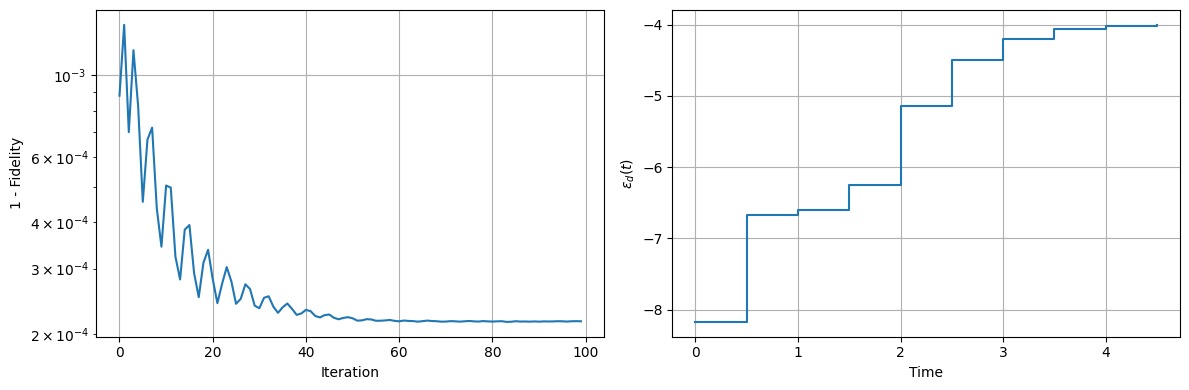

In [32]:
import dynamiqs as dq
import jax
import jax.numpy as jnp
from jax.example_libraries.optimizers import adam
import matplotlib.pyplot as plt

# Parameters
T = 5.0
N = 10                      # Number of time bins
alpha_target = 2.0          # Target α (α² = 4)
na = 20                     # Memory mode truncation
nb = 5                      # Buffer mode truncation
g2 = 1.0                    # Two-photon coupling
kappa_b = 10                # Buffer dissipation rate

# Target state (even cat state |+⟩)
coherent_plus = dq.coherent(na, alpha_target)
coherent_minus = dq.coherent(na, -alpha_target)
cat_plus = (coherent_plus + coherent_minus).unit()

# Operators
a = dq.destroy(na)
b = dq.destroy(nb)
a_full = dq.tensor(a, dq.eye(nb))
b_full = dq.tensor(dq.eye(na), b)
H_2ph = g2 * (a_full.dag() @ a_full.dag() @ b_full) + jnp.conjugate(g2) * (a_full @ a_full @ b_full.dag())
c_ops = [jnp.sqrt(kappa_b) * b_full]

# Initial state (vacuum)
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Loss function (1 - fidelity)
def loss(epsilon_d_values):
    dt = T / N
    state = psi0
    for i in range(N):
        H_d = epsilon_d_values[i] * (b_full + b_full.dag())
        H = H_2ph + H_d
        result = dq.mesolve(H, c_ops, state, jnp.array([0.0, dt]))
        state = result.states[-1]
    rho_a = dq.ptrace(state, 0)
    return 1.0 - dq.fidelity(rho_a, cat_plus)

# Initialize optimizer
opt_init, opt_update, get_params = adam(step_size=0.1)
epsilon_d_initial = -4.0 * jnp.ones(N)  # Initial guess (constant drive)
opt_state = opt_init(epsilon_d_initial)

# JIT-compiled optimization step
@jax.jit
def step(opt_state, _):
    params = get_params(opt_state)
    loss_val, grads = jax.value_and_grad(loss)(params)
    opt_state = opt_update(0, grads, opt_state)
    return opt_state, loss_val

# Run optimization
loss_history = []
for it in range(100):
    opt_state, loss_val = step(opt_state, None)
    loss_history.append(float(loss_val))
    print(f"Iter {it:3d} | Loss: {loss_val:.4f}")

# Get optimized ε_d(t)
epsilon_d_optimized = get_params(opt_state)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot loss history
ax1.plot(loss_history)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('1 - Fidelity')
ax1.set_yscale('log')
ax1.grid(True)

# Plot optimized ε_d(t)
t_bins = jnp.linspace(0, T, N, endpoint=False)
ax2.step(t_bins, epsilon_d_optimized, where='post')
ax2.set_xlabel('Time')
ax2.set_ylabel('$\\epsilon_d(t)$')
ax2.grid(True)

plt.tight_layout()
plt.show()